In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
%matplotlib inline



from sklearn.ensemble import RandomForestClassifier




In [2]:
print('Numpy Version',np.__version__)
print('Pandas Version',pd.__version__)
print('Seaborn Version',sns.__version__)
print('Matplotlib Version',matplotlib.__version__)

Numpy Version 1.22.2
Pandas Version 1.2.4
Seaborn Version 0.11.1
Matplotlib Version 3.3.4


In [3]:
df = pd.read_excel("Customer Churn Data.xlsx", sheet_name='Data for DSBA')

In [4]:
df.shape

(11260, 19)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  object 
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  object 
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11158 non-null  object 
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

In [6]:
df.describe(include="all").T

count  unique         top    freq       mean  \
AccountID                11260.0     NaN         NaN     NaN    25629.5   
Churn                    11260.0     NaN         NaN     NaN   0.168384   
Tenure                   11158.0    38.0         1.0  1351.0        NaN   
City_Tier                11148.0     NaN         NaN     NaN   1.653929   
CC_Contacted_LY          11158.0     NaN         NaN     NaN  17.867091   
Payment                    11151       5  Debit Card    4587        NaN   
Gender                     11152       4        Male    6328        NaN   
Service_Score            11162.0     NaN         NaN     NaN   2.902526   
Account_user_count       11148.0     7.0         4.0  4569.0        NaN   
account_segment            11163       7       Super    4062        NaN   
CC_Agent_Score           11144.0     NaN         NaN     NaN   3.066493   
Marital_Status             11048       3     Married    5860        NaN   
rev_per_month            11158.0    59.0         3.0  1746.0        NaN   
Complain_ly              10903.0     NaN         NaN     NaN   0.285334   
rev_growth_yoy           11260.0    20.0        14.0  1524.0        NaN   
coupon_used_for_payment  11260.0    20.0         1.0  4373.0        NaN   
Day_Since_CC_connect     10903.0    24.0         3.0  1816.0        NaN   
cashback                 10789.0  5693.0      155.62    10.0        NaN   
Login_device               11039       3      Mobile    7482        NaN   

                                std      min       25%      50%       75%  \
AccountID                3250.62635  20000.0  22814.75  25629.5  28444.25   
Churn                      0.374223      0.0       0.0      0.0       0.0   
Tenure                          NaN      NaN       NaN      NaN       NaN   
City_Tier                  0.915015      1.0       1.0      1.0       3.0   
CC_Contacted_LY            8.853269      4.0      11.0     16.0      23.0   
Payment                         NaN      NaN       NaN      NaN       NaN   
Gender                          NaN      NaN       NaN      NaN       NaN   
Service_Score              0.725584      0.0       2.0      3.0       3.0   
Account_user_count              NaN      NaN       NaN      NaN       NaN   
account_segment                 NaN      NaN       NaN      NaN       NaN   
CC_Agent_Score             1.379772      1.0       2.0      3.0       4.0   
Marital_Status                  NaN      NaN       NaN      NaN       NaN   
rev_per_month                   NaN      NaN       NaN      NaN       NaN   
Complain_ly                0.451594      0.0       0.0      0.0       1.0   
rev_growth_yoy                  NaN      NaN       NaN      NaN       NaN   
coupon_used_for_payment         NaN      NaN       NaN      NaN       NaN   
Day_Since_CC_connect            NaN      NaN       NaN      NaN       NaN   
cashback                        NaN      NaN       NaN      NaN       NaN   
Login_device                    NaN      NaN       NaN      NaN       NaN   

                             max  
AccountID                31259.0  
Churn                        1.0  
Tenure                       NaN  
City_Tier                    3.0  
CC_Contacted_LY            132.0  
Payment                      NaN  
Gender                       NaN  
Service_Score                5.0  
Account_user_count           NaN  
account_segment              NaN  
CC_Agent_Score               5.0  
Marital_Status               NaN  
rev_per_month                NaN  
Complain_ly                  1.0  
rev_growth_yoy               NaN  
coupon_used_for_payment      NaN  
Day_Since_CC_connect         NaN  
cashback                     NaN  
Login_device                 NaN

In [7]:
duplicate = df[df.duplicated()]
 
print("Duplicate Rows :")
 
# Print the resultant Dataframe
duplicate

Duplicate Rows :


Empty DataFrame
Columns: [AccountID, Churn, Tenure, City_Tier, CC_Contacted_LY, Payment, Gender, Service_Score, Account_user_count, account_segment, CC_Agent_Score, Marital_Status, rev_per_month, Complain_ly, rev_growth_yoy, coupon_used_for_payment, Day_Since_CC_connect, cashback, Login_device]
Index: []

In [8]:
### Examine missing values
df_na = df.isna().sum()
df_na[df_na.values > 0].sort_values(ascending=False) # Find out all variables that contain missing values

cashback                471
Complain_ly             357
Day_Since_CC_connect    357
Login_device            221
Marital_Status          212
CC_Agent_Score          116
City_Tier               112
Account_user_count      112
Payment                 109
Gender                  108
Tenure                  102
CC_Contacted_LY         102
rev_per_month           102
Service_Score            98
account_segment          97
dtype: int64

In [9]:
df.isnull().sum().sort_values(ascending = False)/df.index.size

cashback                   0.041829
Day_Since_CC_connect       0.031705
Complain_ly                0.031705
Login_device               0.019627
Marital_Status             0.018828
CC_Agent_Score             0.010302
City_Tier                  0.009947
Account_user_count         0.009947
Payment                    0.009680
Gender                     0.009591
Tenure                     0.009059
CC_Contacted_LY            0.009059
rev_per_month              0.009059
Service_Score              0.008703
account_segment            0.008615
coupon_used_for_payment    0.000000
rev_growth_yoy             0.000000
Churn                      0.000000
AccountID                  0.000000
dtype: float64

In [10]:
df.Churn.value_counts()

0    9364
1    1896
Name: Churn, dtype: int64

In [11]:
df.Churn.value_counts(normalize=True)

0    0.831616
1    0.168384
Name: Churn, dtype: float64

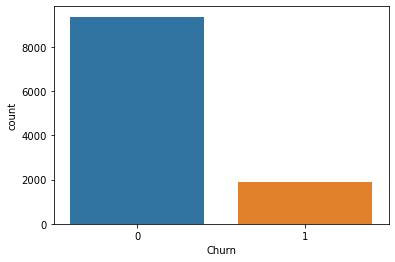

In [12]:
ax = sns.countplot(x="Churn", data=df)

<AxesSubplot:ylabel='Churn'>

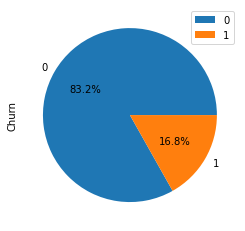

In [13]:

labels = df.Churn.value_counts().index
df.Churn.value_counts().plot(kind='pie', legend = True, labels=labels, autopct='%.1f%%')

In [14]:

df.groupby("Tenure", sort=True)["Tenure"].count()

Tenure
0     1231
1     1351
2      354
3      410
4      403
5      403
6      363
7      450
8      519
9      496
10     423
11     388
12     360
13     359
14     345
15     311
16     291
17     215
18     253
19     273
20     217
21     170
22     151
23     169
24     147
25     114
26     122
27     131
28     137
29     114
30     137
31      96
50       2
51       2
60       2
61       2
99     131
#      116
Name: Tenure, dtype: int64

In [15]:
df['Tenure'] = df['Tenure'].replace('#', np.nan)

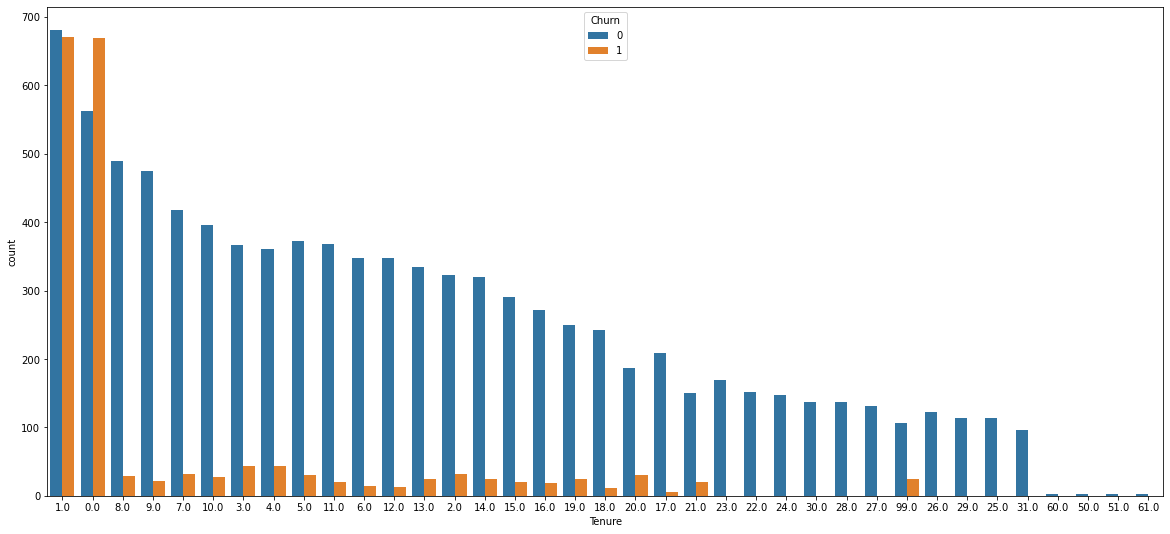

In [16]:
countplot, ax = plt.subplots(figsize = (20,9))
ax = sns.countplot(x="Tenure", data=df,order = df['Tenure'].value_counts().index, hue="Churn")



In [17]:
df.City_Tier.value_counts()

1.0    7263
3.0    3405
2.0     480
Name: City_Tier, dtype: int64

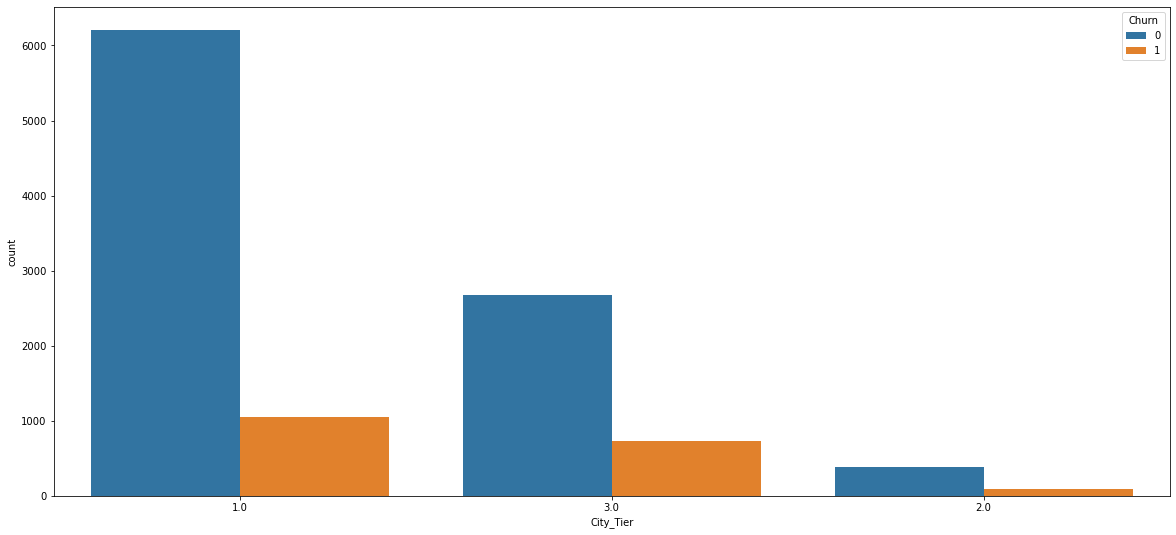

In [18]:
countplot, ax = plt.subplots(figsize = (20,9))
ax = sns.countplot(x="City_Tier", data=df,order = df['City_Tier'].value_counts().index, hue="Churn")


<AxesSubplot:ylabel='City_Tier'>

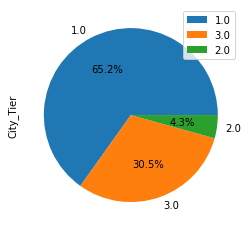

In [19]:

labels = df.City_Tier.value_counts().index
df.City_Tier.value_counts().plot(kind='pie', legend = True, labels=labels, autopct='%.1f%%')

In [20]:
#df.CC_Contacted_LY.value_counts()

df.groupby("CC_Contacted_LY", sort=True)["CC_Contacted_LY"].count()

CC_Contacted_LY
4.0        1
5.0        8
6.0      311
7.0      391
8.0      538
9.0      655
10.0     489
11.0     524
12.0     571
13.0     655
14.0     682
15.0     623
16.0     663
17.0     525
18.0     374
19.0     364
20.0     319
21.0     310
22.0     282
23.0     241
24.0     214
25.0     197
26.0     169
27.0     174
28.0     178
29.0     181
30.0     175
31.0     165
32.0     192
33.0     155
34.0     178
35.0     165
36.0     148
37.0      96
38.0      73
39.0      55
40.0      46
41.0      29
42.0      30
43.0       8
126.0      1
127.0      1
129.0      1
132.0      1
Name: CC_Contacted_LY, dtype: int64

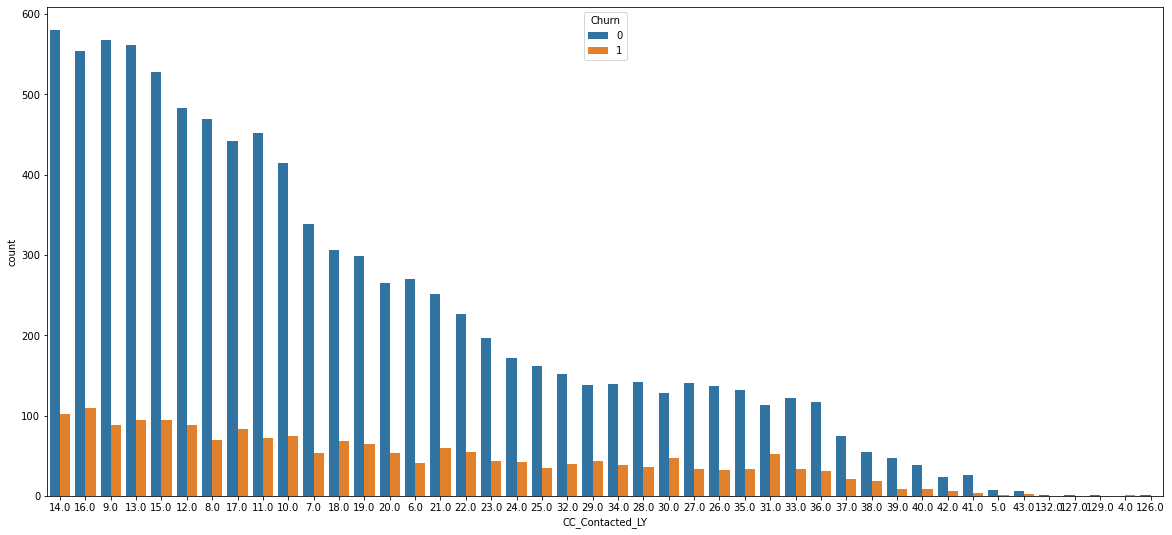

In [21]:
countplot, ax = plt.subplots(figsize = (20,9))
ax = sns.countplot(x="CC_Contacted_LY", data=df,order = df['CC_Contacted_LY'].value_counts().index, hue="Churn")


In [22]:
df.Payment.value_counts()

Debit Card          4587
Credit Card         3511
E wallet            1217
Cash on Delivery    1014
UPI                  822
Name: Payment, dtype: int64

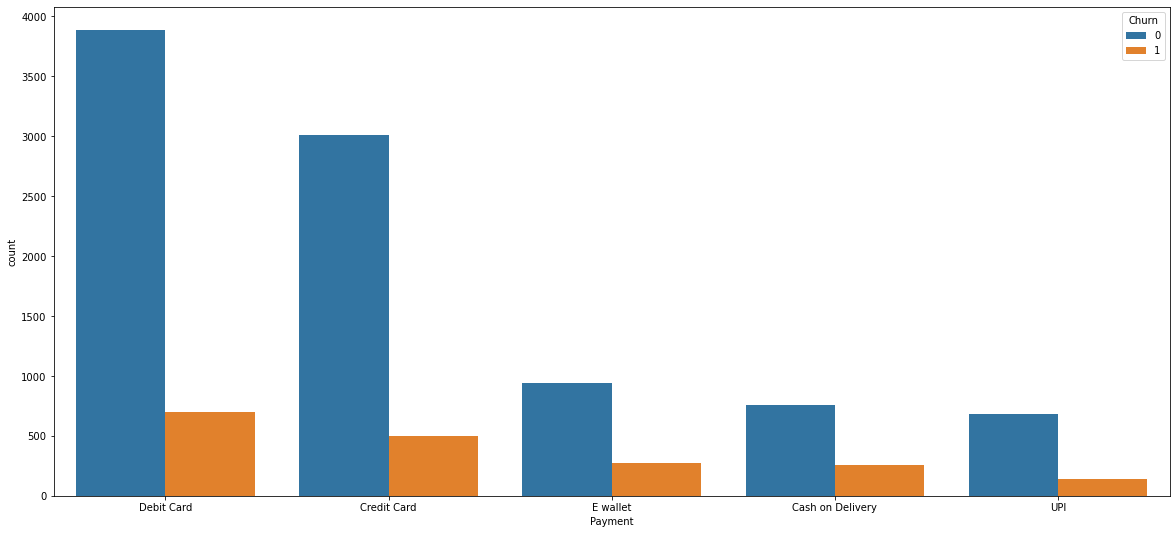

In [23]:
countplot, ax = plt.subplots(figsize = (20,9))
ax = sns.countplot(x="Payment", data=df,order = df['Payment'].value_counts().index, hue="Churn")


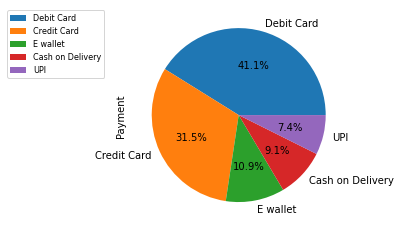

In [24]:

labels = df.Payment.value_counts().index
df.Payment.value_counts().plot(kind='pie', legend = True, labels=labels, autopct='%.1f%%')
plt.legend(  bbox_to_anchor=(-0.1, 1.),fontsize=8)

In [25]:
df.Gender.value_counts()

Male      6328
Female    4178
M          376
F          270
Name: Gender, dtype: int64

In [26]:
df['Gender'] = np.where(df['Gender']=="M",'Male',df['Gender'])
df['Gender'] = np.where(df['Gender']=="F",'Female',df['Gender'])

In [27]:
df.Gender.value_counts()

Male      6704
Female    4448
Name: Gender, dtype: int64

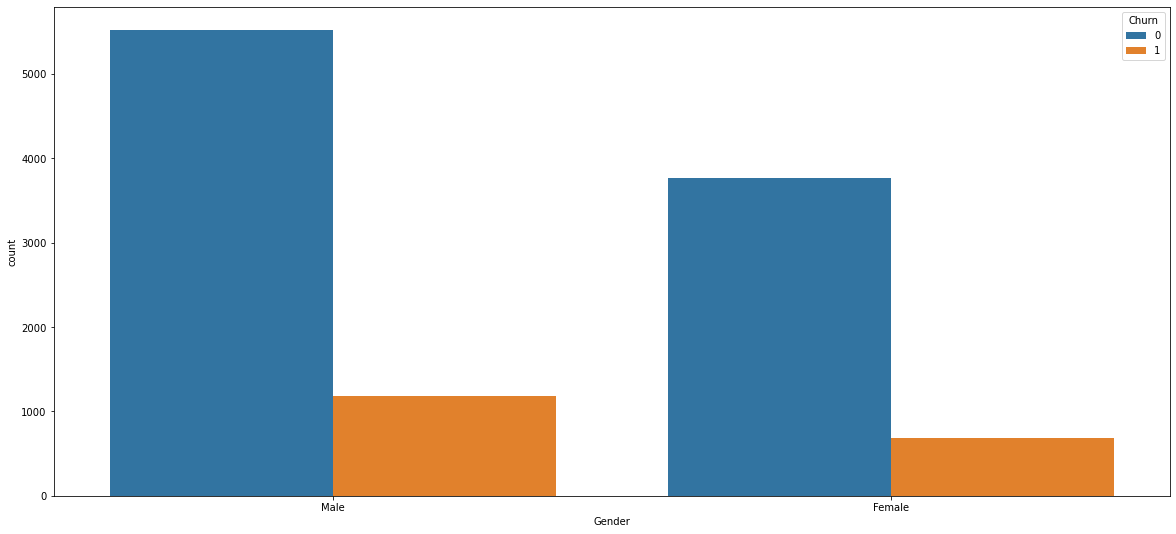

In [28]:
countplot, ax = plt.subplots(figsize = (20,9))
ax = sns.countplot(x="Gender", data=df,order = df['Gender'].value_counts().index, hue="Churn")


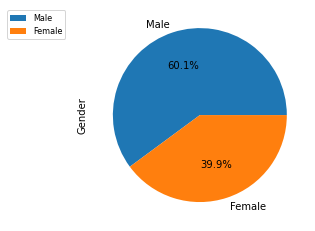

In [29]:

labels = df.Gender.value_counts().index
df.Gender.value_counts().plot(kind='pie', legend = True, labels=labels, autopct='%.1f%%')
plt.legend(  bbox_to_anchor=(-0.1, 1.),fontsize=8)

In [30]:
#df.Service_Score.value_counts()
df.groupby("Service_Score", sort=True)["Service_Score"].count()

Service_Score
0.0       8
1.0      77
2.0    3251
3.0    5490
4.0    2331
5.0       5
Name: Service_Score, dtype: int64

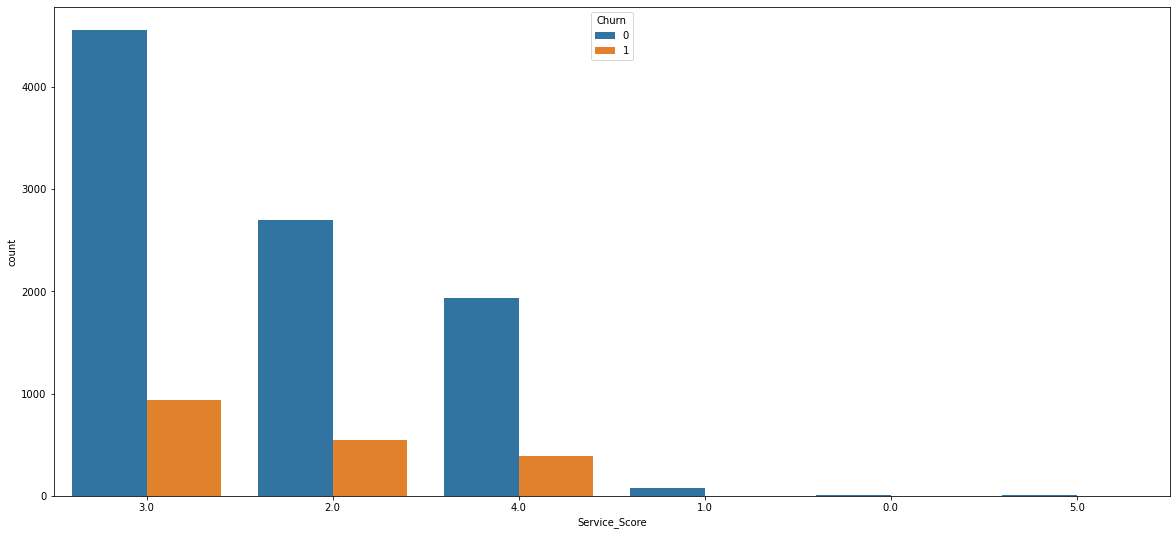

In [31]:
countplot, ax = plt.subplots(figsize = (20,9))
ax = sns.countplot(x="Service_Score", data=df,order = df['Service_Score'].value_counts().index, hue="Churn")


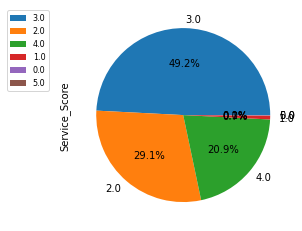

In [32]:

labels = df.Service_Score.value_counts().index
df.Service_Score.value_counts().plot(kind='pie', legend = True, labels=labels, autopct='%.1f%%')
plt.legend(  bbox_to_anchor=(-0.1, 1.),fontsize=8)

In [33]:
df.Account_user_count.value_counts()

4    4569
3    3261
5    1699
2     526
1     446
@     332
6     315
Name: Account_user_count, dtype: int64

In [34]:
df['Account_user_count'] = df['Account_user_count'].replace('@', np.nan)

In [35]:
#df.Account_user_count.value_counts()
df.groupby("Account_user_count", sort=True)["Account_user_count"].count()

Account_user_count
1.0     446
2.0     526
3.0    3261
4.0    4569
5.0    1699
6.0     315
Name: Account_user_count, dtype: int64

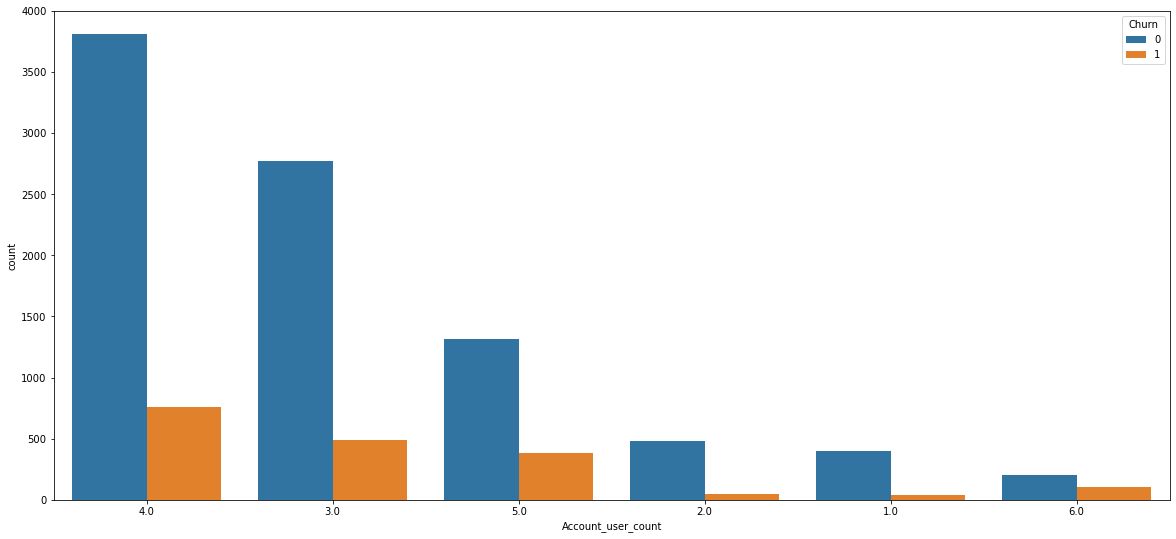

In [36]:
countplot, ax = plt.subplots(figsize = (20,9))
ax = sns.countplot(x="Account_user_count", data=df,order = df['Account_user_count'].value_counts().index, hue="Churn")


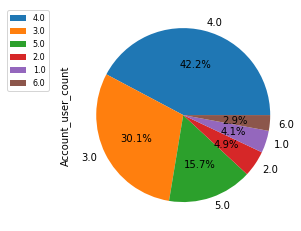

In [37]:

labels = df.Account_user_count.value_counts().index
df.Account_user_count.value_counts().plot(kind='pie', legend = True, labels=labels, autopct='%.1f%%')
plt.legend(  bbox_to_anchor=(-0.1, 1.),fontsize=8)

In [38]:
df.account_segment.value_counts()
#df.groupby("account_segment", sort=True)["account_segment"].count()

Super           4062
Regular Plus    3862
HNI             1639
Super Plus       771
Regular          520
Regular +        262
Super +           47
Name: account_segment, dtype: int64

In [39]:
df['account_segment'] = df['account_segment'].replace('Regular +', 'Regular_Plus')
df['account_segment'] = df['account_segment'].replace('Super +', 'Super_Plus')
df['account_segment'] = df['account_segment'].replace('Regular Plus', 'Regular_Plus')
df['account_segment'] = df['account_segment'].replace('Super Plus', 'Super_Plus')


In [40]:
df.account_segment.value_counts()

Regular_Plus    4124
Super           4062
HNI             1639
Super_Plus       818
Regular          520
Name: account_segment, dtype: int64

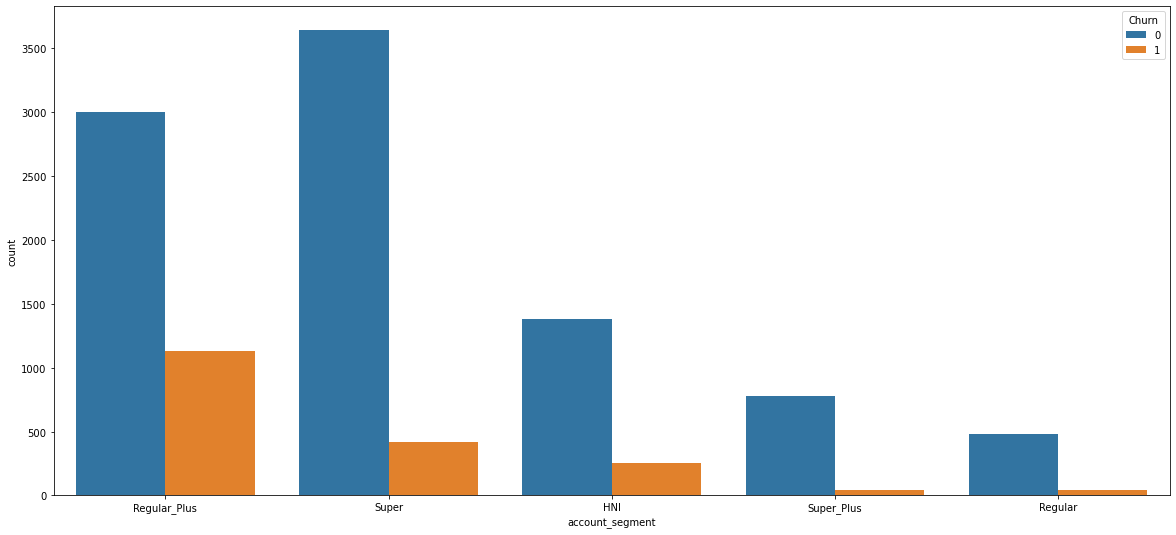

In [41]:
countplot, ax = plt.subplots(figsize = (20,9))
ax = sns.countplot(x="account_segment", data=df,order = df['account_segment'].value_counts().index, hue="Churn")


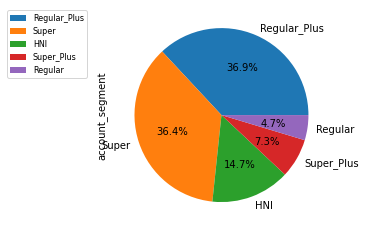

In [42]:

labels = df.account_segment.value_counts().index
df.account_segment.value_counts().plot(kind='pie', legend = True, labels=labels, autopct='%.1f%%')
plt.legend(  bbox_to_anchor=(-0.1, 1.),fontsize=8)

In [43]:
#df.CC_Agent_Score.value_counts()
df.groupby("CC_Agent_Score", sort=True)["CC_Agent_Score"].count()

CC_Agent_Score
1.0    2302
2.0    1164
3.0    3360
4.0    2127
5.0    2191
Name: CC_Agent_Score, dtype: int64

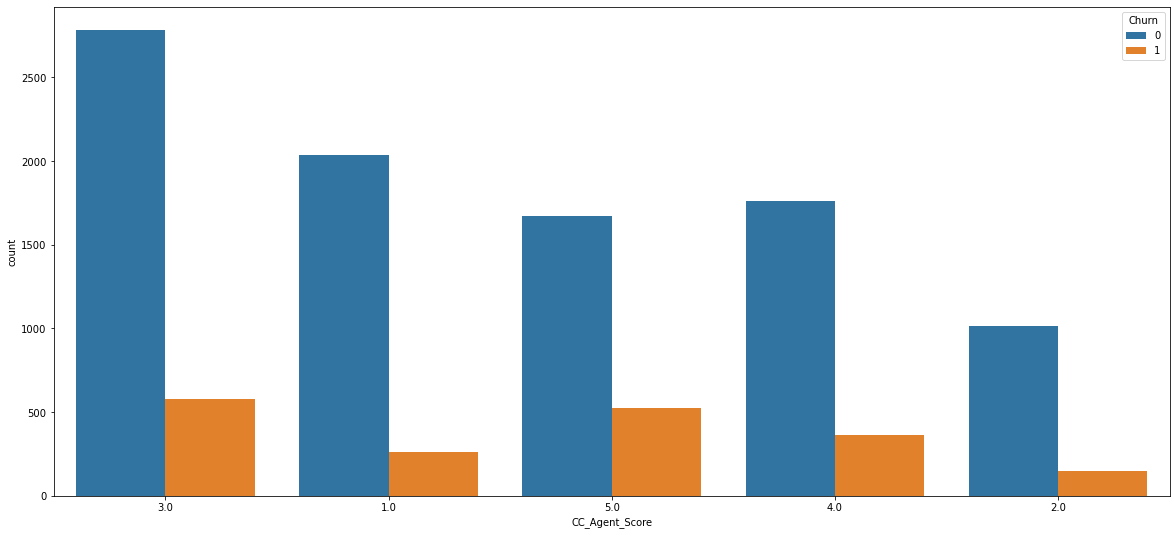

In [44]:
countplot, ax = plt.subplots(figsize = (20,9))
ax = sns.countplot(x="CC_Agent_Score", data=df,order = df['CC_Agent_Score'].value_counts().index, hue="Churn")


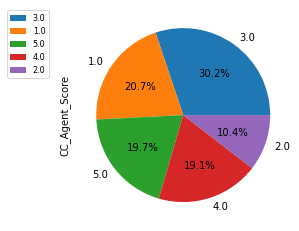

In [45]:

labels = df.CC_Agent_Score.value_counts().index
df.CC_Agent_Score.value_counts().plot(kind='pie', legend = True, labels=labels, autopct='%.1f%%')
plt.legend(  bbox_to_anchor=(-0.1, 1.),fontsize=8)

In [46]:
df.Marital_Status.value_counts()

Married     5860
Single      3520
Divorced    1668
Name: Marital_Status, dtype: int64

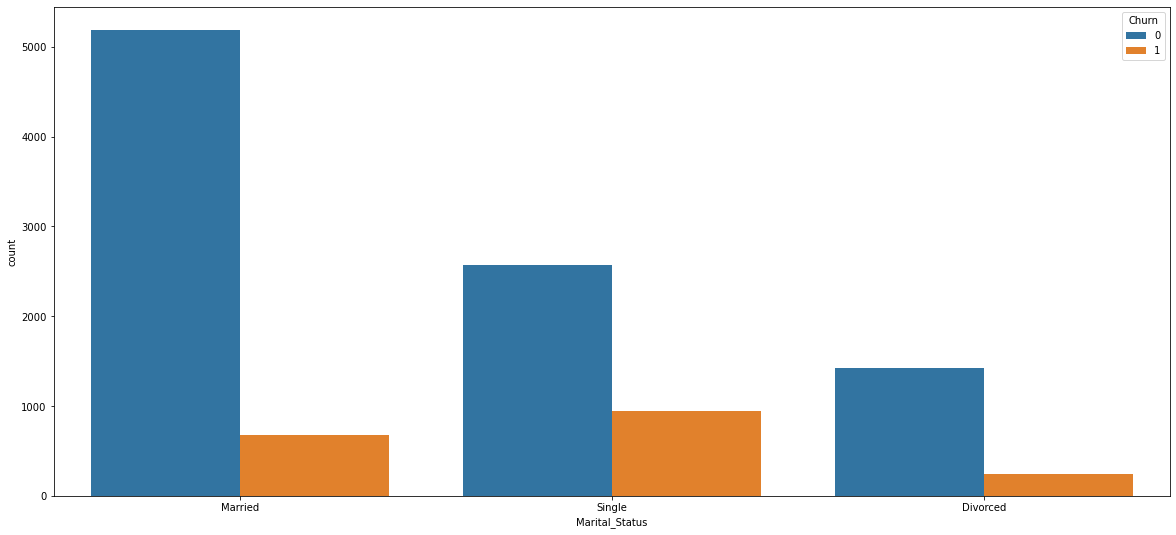

In [47]:
countplot, ax = plt.subplots(figsize = (20,9))
ax = sns.countplot(x="Marital_Status", data=df,order = df['Marital_Status'].value_counts().index, hue="Churn")


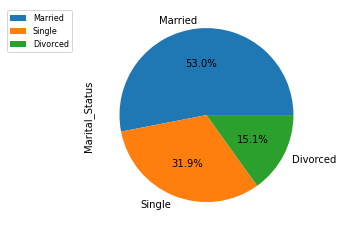

In [48]:

labels = df.Marital_Status.value_counts().index
df.Marital_Status.value_counts().plot(kind='pie', legend = True, labels=labels, autopct='%.1f%%')
plt.legend(  bbox_to_anchor=(-0.1, 1.),fontsize=8)

In [49]:
#df.rev_per_month.value_counts()
df.groupby("rev_per_month", sort=True)["rev_per_month"].count()

rev_per_month
1       402
2      1585
3      1746
4      1218
5      1337
6      1085
7       754
8       643
9       564
10      413
11      278
12      166
13       93
14       48
15       24
19        2
20        1
21        1
22        2
23        1
25        1
100       1
101       3
102       8
103       1
104       1
105       2
107       5
108       3
109       1
110       3
111       1
113       3
114       2
115       3
116       3
117       3
118       4
119       3
120       2
121       2
122       1
123       5
124       5
125       2
126       3
127       3
129       4
130       3
131       2
133       4
134       2
135       1
136       4
137       3
138       3
139       2
140       4
+       689
Name: rev_per_month, dtype: int64

In [50]:
df['rev_per_month'] = df['rev_per_month'].replace('+', np.nan)

In [51]:

df.groupby("rev_per_month", sort=True)["rev_per_month"].count()

rev_per_month
1.0       402
2.0      1585
3.0      1746
4.0      1218
5.0      1337
6.0      1085
7.0       754
8.0       643
9.0       564
10.0      413
11.0      278
12.0      166
13.0       93
14.0       48
15.0       24
19.0        2
20.0        1
21.0        1
22.0        2
23.0        1
25.0        1
100.0       1
101.0       3
102.0       8
103.0       1
104.0       1
105.0       2
107.0       5
108.0       3
109.0       1
110.0       3
111.0       1
113.0       3
114.0       2
115.0       3
116.0       3
117.0       3
118.0       4
119.0       3
120.0       2
121.0       2
122.0       1
123.0       5
124.0       5
125.0       2
126.0       3
127.0       3
129.0       4
130.0       3
131.0       2
133.0       4
134.0       2
135.0       1
136.0       4
137.0       3
138.0       3
139.0       2
140.0       4
Name: rev_per_month, dtype: int64

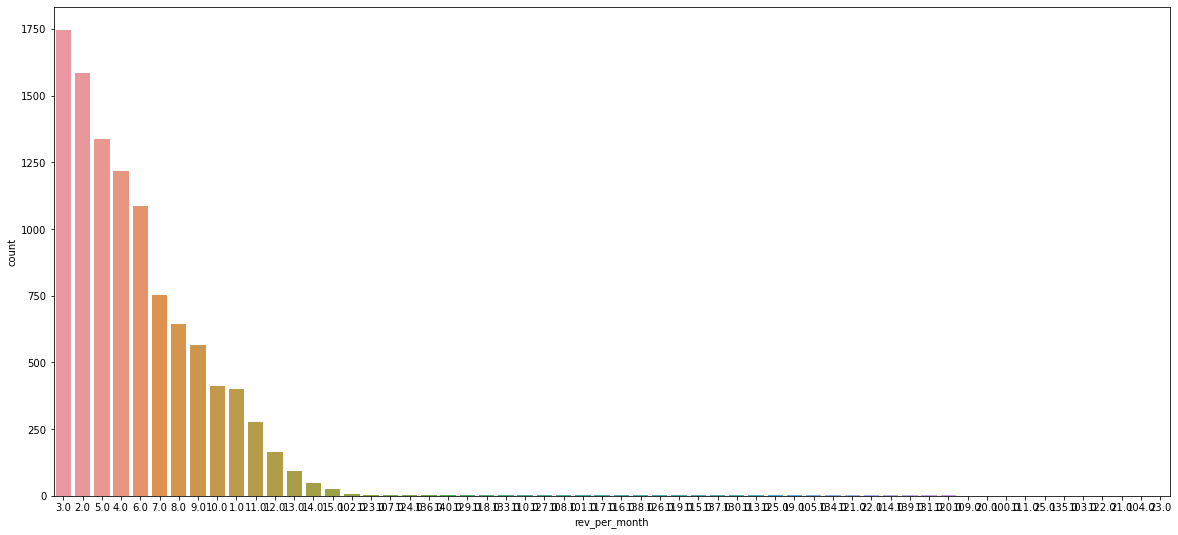

In [52]:
countplot, ax = plt.subplots(figsize = (20,9))
ax = sns.countplot(x="rev_per_month", data=df,order = df['rev_per_month'].value_counts().index)


In [53]:
df.Complain_ly.value_counts()

0.0    7792
1.0    3111
Name: Complain_ly, dtype: int64

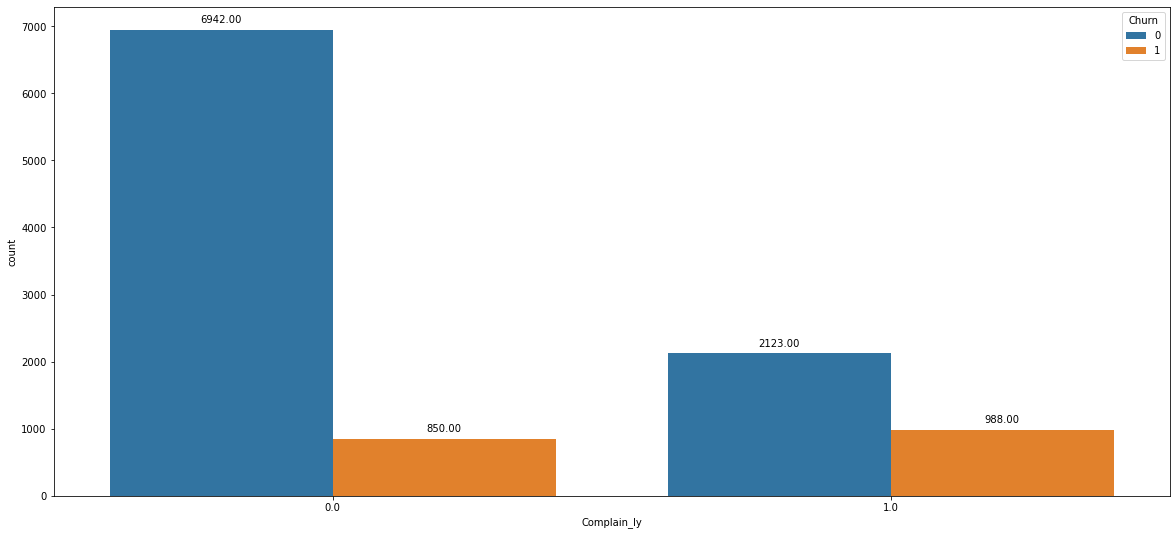

In [54]:
countplot, ax = plt.subplots(figsize = (20,9))
ax = sns.countplot(x="Complain_ly", data=df,order = df['Complain_ly'].value_counts().index, hue="Churn")

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


<AxesSubplot:ylabel='Complain_ly'>

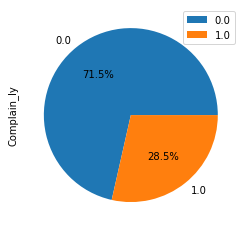

In [55]:

labels = df.Complain_ly.value_counts().index
df.Complain_ly.value_counts().plot(kind='pie', legend = True, labels=labels, autopct='%.1f%%')

In [56]:
df.rev_growth_yoy.value_counts()

14    1524
13    1427
15    1283
12    1210
16     949
18     708
17     704
19     619
20     562
11     523
21     433
22     403
23     345
24     229
25     188
26      98
27      35
28      14
4        3
$        3
Name: rev_growth_yoy, dtype: int64

In [57]:
df['rev_growth_yoy'] = df['rev_growth_yoy'].replace('$', np.nan)

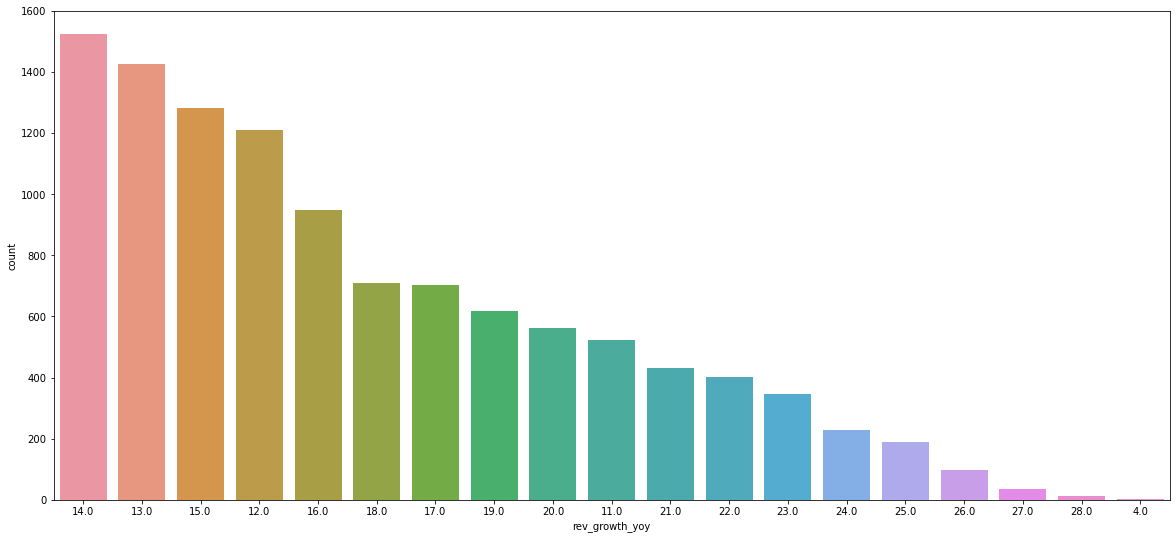

In [58]:
countplot, ax = plt.subplots(figsize = (20,9))
ax = sns.countplot(x="rev_growth_yoy", data=df,order = df['rev_growth_yoy'].value_counts().index)


In [59]:
df.coupon_used_for_payment.value_counts()

1     4373
2     2656
0     2150
3      698
4      424
5      284
6      234
7      184
8       88
10      34
9       34
11      30
12      26
13      22
14      12
15       4
16       4
#        1
$        1
*        1
Name: coupon_used_for_payment, dtype: int64

In [60]:
df['coupon_used_for_payment'] = df['coupon_used_for_payment'].replace('$', np.nan)
df['coupon_used_for_payment'] = df['coupon_used_for_payment'].replace('#', np.nan)
df['coupon_used_for_payment'] = df['coupon_used_for_payment'].replace('*', np.nan)

In [61]:
#df.coupon_used_for_payment.value_counts()
df.groupby("coupon_used_for_payment", sort=True)["coupon_used_for_payment"].count()

coupon_used_for_payment
0.0     2150
1.0     4373
2.0     2656
3.0      698
4.0      424
5.0      284
6.0      234
7.0      184
8.0       88
9.0       34
10.0      34
11.0      30
12.0      26
13.0      22
14.0      12
15.0       4
16.0       4
Name: coupon_used_for_payment, dtype: int64

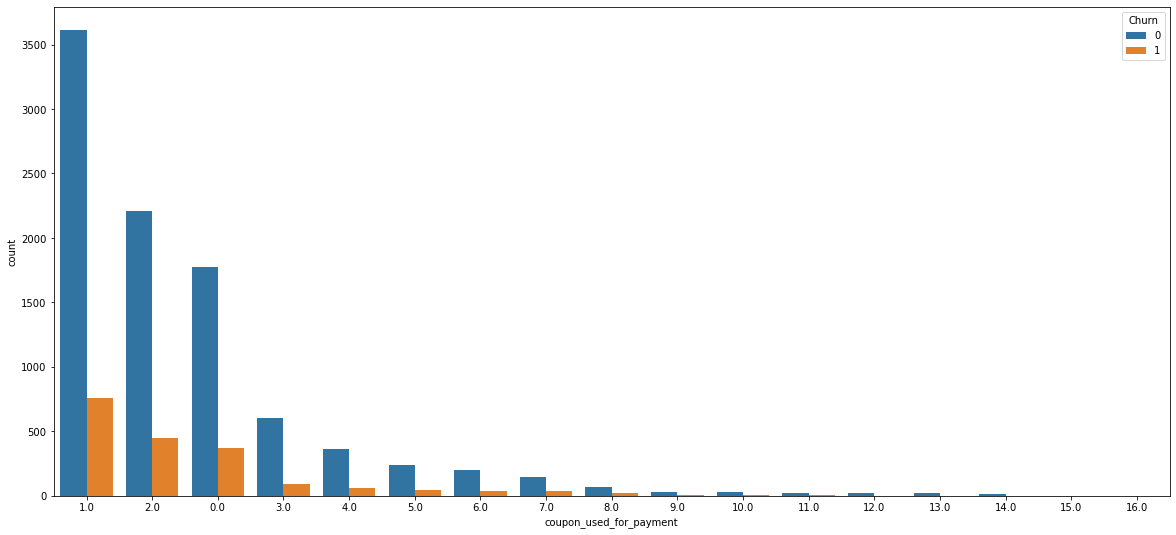

In [62]:
countplot, ax = plt.subplots(figsize = (20,9))
ax = sns.countplot(x="coupon_used_for_payment", data=df,order = df['coupon_used_for_payment'].value_counts().index, hue="Churn")


In [63]:
df.Day_Since_CC_connect.value_counts()

3     1816
2     1574
1     1256
8     1169
0      964
7      911
4      893
9      622
5      479
10     339
6      229
11     183
12     146
13     117
14      74
15      37
17      34
16      26
18      26
30       2
31       2
47       2
46       1
$        1
Name: Day_Since_CC_connect, dtype: int64

In [64]:
df['Day_Since_CC_connect'] = df['Day_Since_CC_connect'].replace('$', np.nan)

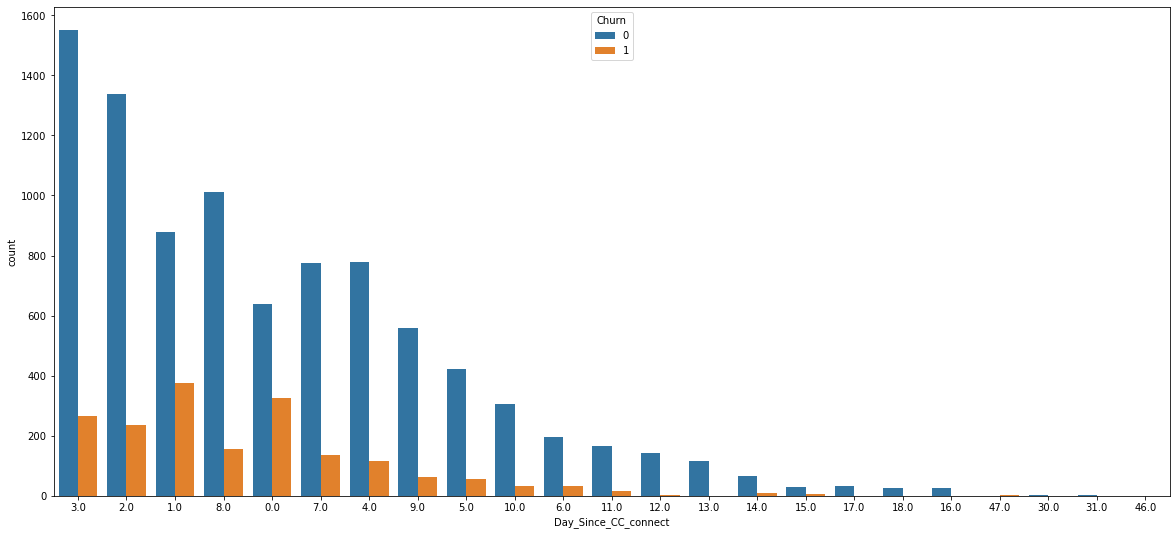

In [65]:
countplot, ax = plt.subplots(figsize = (20,9))
ax = sns.countplot(x="Day_Since_CC_connect", data=df,order = df['Day_Since_CC_connect'].value_counts().index,hue="Churn")


In [66]:
df.cashback.value_counts()

155.62    10
152.28     9
154.73     9
149.36     9
149.68     9
          ..
118.61     1
244.18     1
232.20     1
193.92     1
124.25     1
Name: cashback, Length: 5693, dtype: int64

In [67]:
df['cashback'] = df['cashback'].replace('$', np.nan)

In [68]:
df['cashback'].max()

1997.0

In [69]:
df['cashback'] = df['cashback'].replace('140+', '141')
#we have imputed 140+ as 141 for analysis

In [70]:
df['cashback'].max()

1997.0

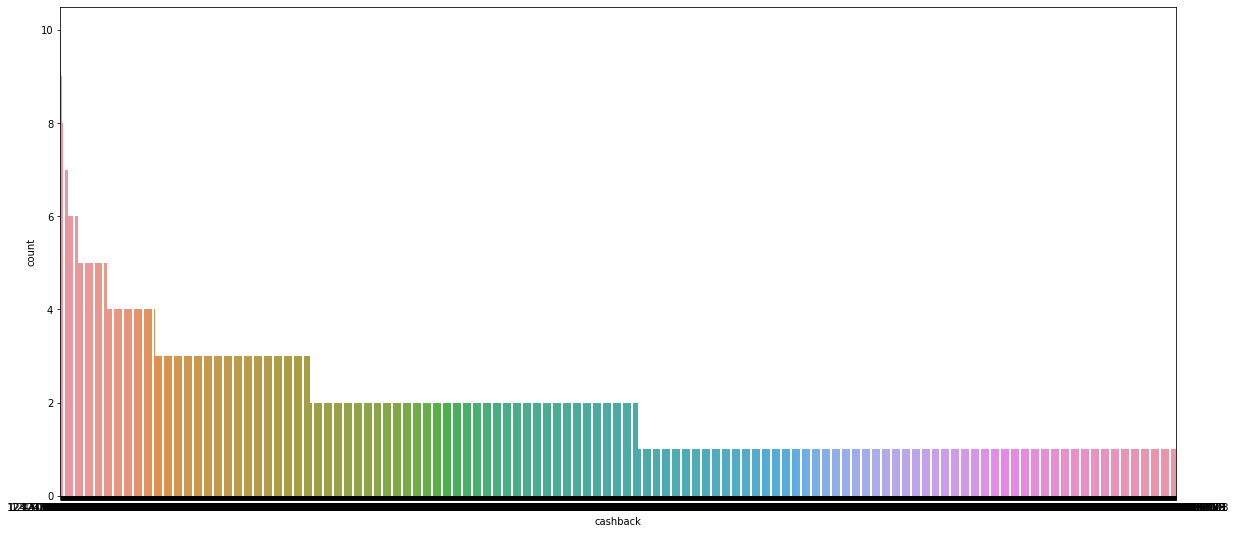

In [71]:
countplot, ax = plt.subplots(figsize = (20,9))
ax = sns.countplot(x="cashback", data=df,order = df['cashback'].value_counts().index)


In [72]:
df.Login_device.value_counts()

Mobile      7482
Computer    3018
&&&&         539
Name: Login_device, dtype: int64

In [73]:
df['Login_device'] = df['Login_device'].replace('&&&&', np.nan)

In [74]:
df.Login_device.value_counts()

Mobile      7482
Computer    3018
Name: Login_device, dtype: int64

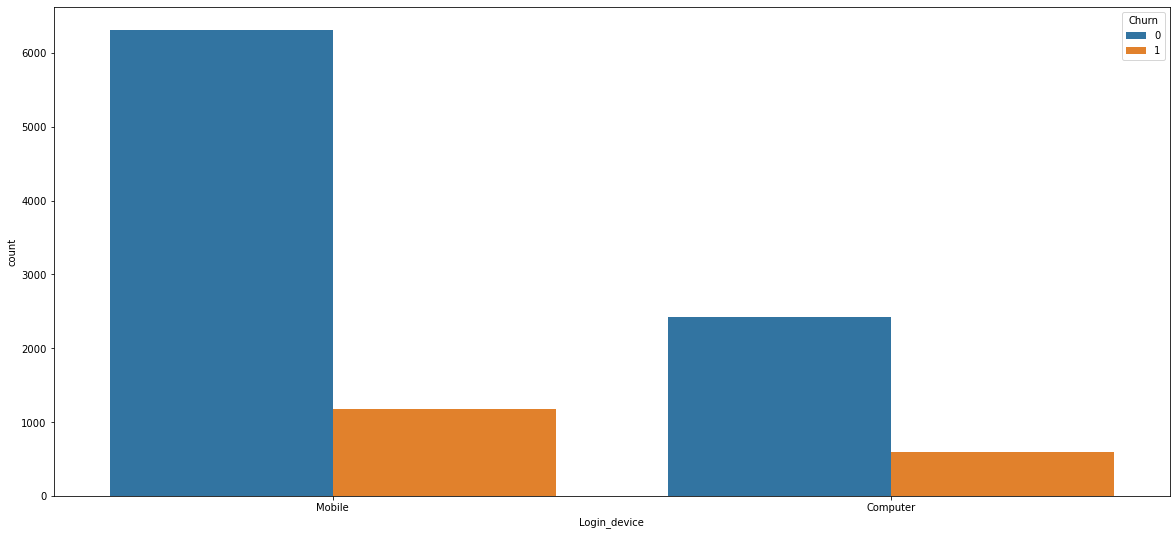

In [75]:
countplot, ax = plt.subplots(figsize = (20,9))
ax = sns.countplot(x="Login_device", data=df,order = df['Login_device'].value_counts().index, hue="Churn")


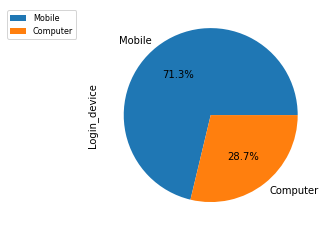

In [76]:

labels = df.Login_device.value_counts().index
df.Login_device.value_counts().plot(kind='pie', legend = True, labels=labels, autopct='%.1f%%')
plt.legend(  bbox_to_anchor=(-0.1, 1.),fontsize=8)

In [77]:
### Examine missing values
df_na = df.isna().sum()
df_na[df_na.values > 0].sort_values(ascending=False) # Find out all variables that contain missing values


rev_per_month              791
Login_device               760
cashback                   473
Account_user_count         444
Day_Since_CC_connect       358
Complain_ly                357
Tenure                     218
Marital_Status             212
CC_Agent_Score             116
City_Tier                  112
Payment                    109
Gender                     108
CC_Contacted_LY            102
Service_Score               98
account_segment             97
rev_growth_yoy               3
coupon_used_for_payment      3
dtype: int64

In [78]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=10)

In [79]:
df.columns

Index(['AccountID', 'Churn', 'Tenure', 'City_Tier', 'CC_Contacted_LY',
       'Payment', 'Gender', 'Service_Score', 'Account_user_count',
       'account_segment', 'CC_Agent_Score', 'Marital_Status', 'rev_per_month',
       'Complain_ly', 'rev_growth_yoy', 'coupon_used_for_payment',
       'Day_Since_CC_connect', 'cashback', 'Login_device'],
      dtype='object')

In [80]:
df.drop('AccountID', axis=1, inplace=True)

In [81]:
cat1 = ['Payment','Gender','account_segment','Marital_Status','Login_device']
df =pd.get_dummies(df,columns=cat1,drop_first=True)

In [82]:
### Examine missing values
df_na = df.isna().sum()
df_na[df_na.values > 0].sort_values(ascending=False) # Find out all variables that contain missing values


rev_per_month              791
cashback                   473
Account_user_count         444
Day_Since_CC_connect       358
Complain_ly                357
Tenure                     218
CC_Agent_Score             116
City_Tier                  112
CC_Contacted_LY            102
Service_Score               98
rev_growth_yoy               3
coupon_used_for_payment      3
dtype: int64

In [83]:
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns = df.columns)

In [84]:
df_imputed.isnull().sum()

Churn                           0
Tenure                          0
City_Tier                       0
CC_Contacted_LY                 0
Service_Score                   0
Account_user_count              0
CC_Agent_Score                  0
rev_per_month                   0
Complain_ly                     0
rev_growth_yoy                  0
coupon_used_for_payment         0
Day_Since_CC_connect            0
cashback                        0
Payment_Credit Card             0
Payment_Debit Card              0
Payment_E wallet                0
Payment_UPI                     0
Gender_Male                     0
account_segment_Regular         0
account_segment_Regular_Plus    0
account_segment_Super           0
account_segment_Super_Plus      0
Marital_Status_Married          0
Marital_Status_Single           0
Login_device_Mobile             0
dtype: int64

In [85]:
 df_imputed.describe().T

count        mean         std  min        25%  \
Churn                         11260.0    0.168384    0.374223  0.0    0.00000   
Tenure                        11260.0   10.989236   12.769921  0.0    2.00000   
City_Tier                     11260.0    1.654032    0.911380  1.0    1.00000   
CC_Contacted_LY               11260.0   17.864893    8.818734  4.0   11.00000   
Service_Score                 11260.0    2.903073    0.723187  0.0    2.00000   
Account_user_count            11260.0    3.691314    1.006108  1.0    3.00000   
CC_Agent_Score                11260.0    3.066066    1.373620  1.0    2.00000   
rev_per_month                 11260.0    6.328828   11.512946  1.0    3.00000   
Complain_ly                   11260.0    0.286039    0.445503  0.0    0.00000   
rev_growth_yoy                11260.0   16.193037    3.757307  4.0   13.00000   
coupon_used_for_payment       11260.0    1.790746    1.969444  0.0    1.00000   
Day_Since_CC_connect          11260.0    4.621741    3.654222  0.0    2.00000   
cashback                      11260.0  196.059267  175.305542  0.0  147.54325   
Payment_Credit Card           11260.0    0.311812    0.463254  0.0    0.00000   
Payment_Debit Card            11260.0    0.407371    0.491367  0.0    0.00000   
Payment_E wallet              11260.0    0.108082    0.310497  0.0    0.00000   
Payment_UPI                   11260.0    0.073002    0.260151  0.0    0.00000   
Gender_Male                   11260.0    0.595382    0.490840  0.0    0.00000   
account_segment_Regular       11260.0    0.046181    0.209887  0.0    0.00000   
account_segment_Regular_Plus  11260.0    0.366252    0.481801  0.0    0.00000   
account_segment_Super         11260.0    0.360746    0.480238  0.0    0.00000   
account_segment_Super_Plus    11260.0    0.072647    0.259567  0.0    0.00000   
Marital_Status_Married        11260.0    0.520426    0.499605  0.0    0.00000   
Marital_Status_Single         11260.0    0.312611    0.463578  0.0    0.00000   
Login_device_Mobile           11260.0    0.664476    0.472194  0.0    0.00000   

                                 50%     75%     max  
Churn                           0.00    0.00     1.0  
Tenure                          9.00   16.00    99.0  
City_Tier                       1.00    3.00     3.0  
CC_Contacted_LY                16.00   23.00   132.0  
Service_Score                   3.00    3.00     5.0  
Account_user_count              4.00    4.00     6.0  
CC_Agent_Score                  3.00    4.00     5.0  
rev_per_month                   5.00    7.00   140.0  
Complain_ly                     0.00    1.00     1.0  
rev_growth_yoy                 15.00   19.00    28.0  
coupon_used_for_payment         1.00    2.00    16.0  
Day_Since_CC_connect            3.00    7.00    47.0  
cashback                      165.69  200.24  1997.0  
Payment_Credit Card             0.00    1.00     1.0  
Payment_Debit Card              0.00    1.00     1.0  
Payment_E wallet                0.00    0.00     1.0  
Payment_UPI                     0.00    0.00     1.0  
Gender_Male                     1.00    1.00     1.0  
account_segment_Regular         0.00    0.00     1.0  
account_segment_Regular_Plus    0.00    1.00     1.0  
account_segment_Super           0.00    1.00     1.0  
account_segment_Super_Plus      0.00    0.00     1.0  
Marital_Status_Married          1.00    1.00     1.0  
Marital_Status_Single           0.00    1.00     1.0  
Login_device_Mobile             1.00    1.00     1.0

In [86]:
df_imputed.head()

Churn  Tenure  City_Tier  CC_Contacted_LY  Service_Score  \
0    1.0     4.0        3.0              6.0            3.0   
1    1.0     0.0        1.0              8.0            3.0   
2    1.0     0.0        1.0             30.0            2.0   
3    1.0     0.0        3.0             15.0            2.0   
4    1.0     0.0        1.0             12.0            2.0   

   Account_user_count  CC_Agent_Score  rev_per_month  Complain_ly  \
0                 3.0             2.0            9.0          1.0   
1                 4.0             3.0            7.0          1.0   
2                 4.0             3.0            6.0          1.0   
3                 4.0             5.0            8.0          0.0   
4                 3.0             5.0            3.0          0.0   

   rev_growth_yoy  ...  Payment_E wallet  Payment_UPI  Gender_Male  \
0            11.0  ...               0.0          0.0          0.0   
1            15.0  ...               0.0          1.0          1.0   
2            14.0  ...               0.0          0.0          1.0   
3            23.0  ...               0.0          0.0          1.0   
4            11.0  ...               0.0          0.0          1.0   

   account_segment_Regular  account_segment_Regular_Plus  \
0                      0.0                           0.0   
1                      0.0                           1.0   
2                      0.0                           1.0   
3                      0.0                           0.0   
4                      0.0                           1.0   

   account_segment_Super  account_segment_Super_Plus  Marital_Status_Married  \
0                    1.0                         0.0                     0.0   
1                    0.0                         0.0                     0.0   
2                    0.0                         0.0                     0.0   
3                    1.0                         0.0                     0.0   
4                    0.0                         0.0                     0.0   

   Marital_Status_Single  Login_device_Mobile  
0                    1.0                  1.0  
1                    1.0                  1.0  
2                    1.0                  1.0  
3                    1.0                  1.0  
4                    1.0                  1.0  

[5 rows x 25 columns]

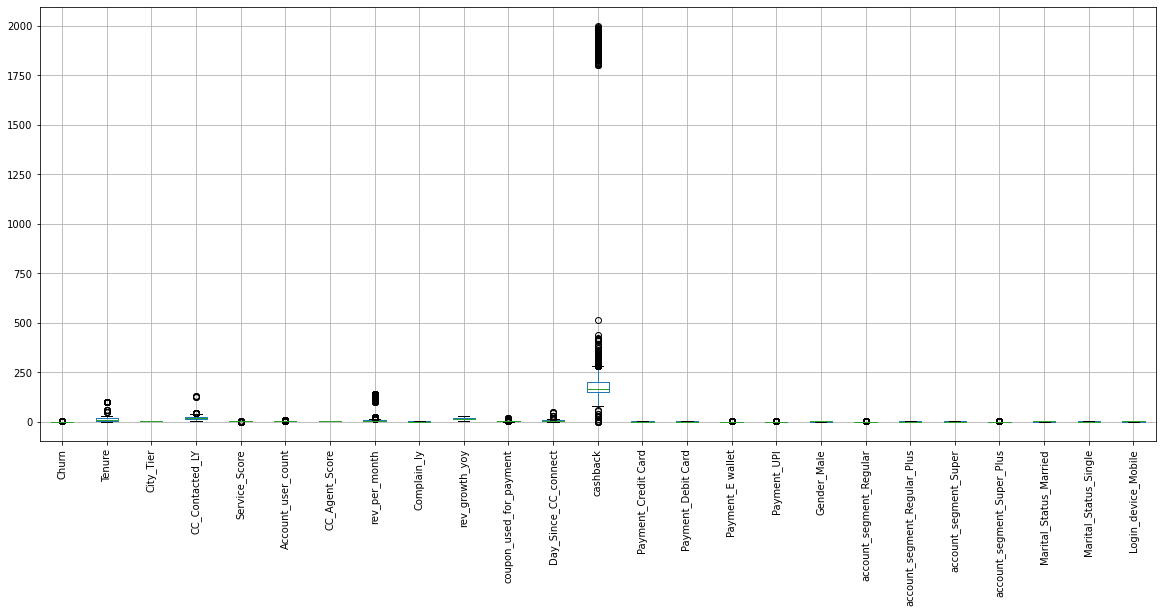

In [87]:
df_imputed.boxplot(figsize=(20,8))
plt.xticks(rotation=90)
plt.show()

In [88]:
Q1 = df_imputed.quantile(0.25)
Q3 = df_imputed.quantile(0.75)
IQR = Q3 - Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR

In [89]:
((df_imputed > UL) | (df_imputed < LL)).sum()

Churn                           1896
Tenure                           139
City_Tier                          0
CC_Contacted_LY                   42
Service_Score                     13
Account_user_count               761
CC_Agent_Score                     0
rev_per_month                    228
Complain_ly                        0
rev_growth_yoy                     0
coupon_used_for_payment         1381
Day_Since_CC_connect             130
cashback                         920
Payment_Credit Card                0
Payment_Debit Card                 0
Payment_E wallet                1217
Payment_UPI                      822
Gender_Male                        0
account_segment_Regular          520
account_segment_Regular_Plus       0
account_segment_Super              0
account_segment_Super_Plus       818
Marital_Status_Married             0
Marital_Status_Single              0
Login_device_Mobile                0
dtype: int64

In [90]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df_imputed[column].describe(),end=' ')
    
    
    plt.figure(figsize=(4,4))
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    plt.hist(x=df_imputed[column])
    plt.show()
    
    plt.figure(figsize=(4,4))
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=df_imputed[column])

    plt.show()

In [91]:
df_num2 = df_imputed.select_dtypes(include = ['float64', 'int64','int8'])
lstnumericcolumns = list(df_num2.columns.values)
len(lstnumericcolumns)

25

Description of Churn
----------------------------------------------------------------------------
count    11260.000000
mean         0.168384
std          0.374223
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Churn, dtype: float64 Distribution of Churn
----------------------------------------------------------------------------


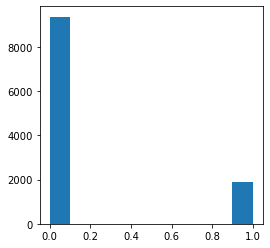

BoxPlot of Churn
----------------------------------------------------------------------------


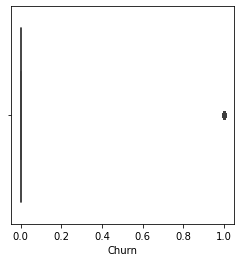

Description of Tenure
----------------------------------------------------------------------------
count    11260.000000
mean        10.989236
std         12.769921
min          0.000000
25%          2.000000
50%          9.000000
75%         16.000000
max         99.000000
Name: Tenure, dtype: float64 Distribution of Tenure
----------------------------------------------------------------------------


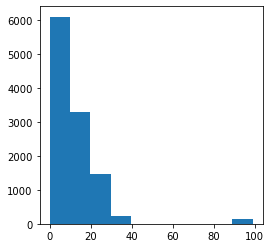

BoxPlot of Tenure
----------------------------------------------------------------------------


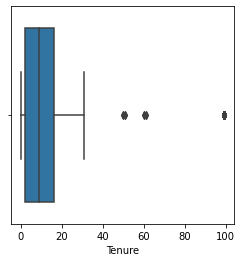

Description of City_Tier
----------------------------------------------------------------------------
count    11260.000000
mean         1.654032
std          0.911380
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max          3.000000
Name: City_Tier, dtype: float64 Distribution of City_Tier
----------------------------------------------------------------------------


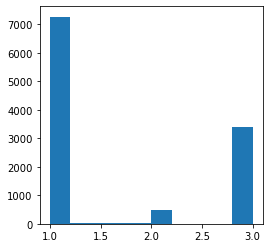

BoxPlot of City_Tier
----------------------------------------------------------------------------


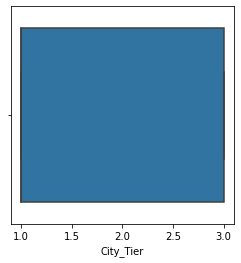

Description of CC_Contacted_LY
----------------------------------------------------------------------------
count    11260.000000
mean        17.864893
std          8.818734
min          4.000000
25%         11.000000
50%         16.000000
75%         23.000000
max        132.000000
Name: CC_Contacted_LY, dtype: float64 Distribution of CC_Contacted_LY
----------------------------------------------------------------------------


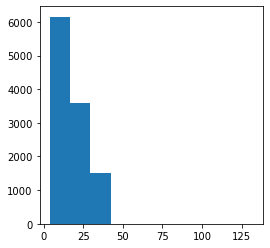

BoxPlot of CC_Contacted_LY
----------------------------------------------------------------------------


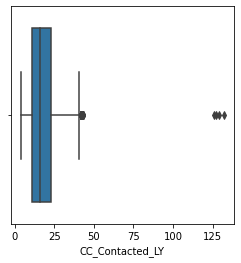

Description of Service_Score
----------------------------------------------------------------------------
count    11260.000000
mean         2.903073
std          0.723187
min          0.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: Service_Score, dtype: float64 Distribution of Service_Score
----------------------------------------------------------------------------


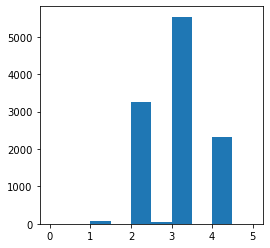

BoxPlot of Service_Score
----------------------------------------------------------------------------


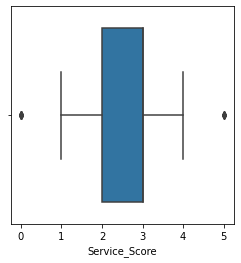

Description of Account_user_count
----------------------------------------------------------------------------
count    11260.000000
mean         3.691314
std          1.006108
min          1.000000
25%          3.000000
50%          4.000000
75%          4.000000
max          6.000000
Name: Account_user_count, dtype: float64 Distribution of Account_user_count
----------------------------------------------------------------------------


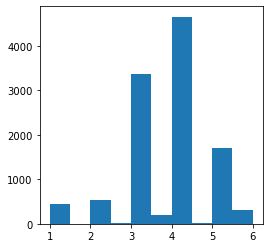

BoxPlot of Account_user_count
----------------------------------------------------------------------------


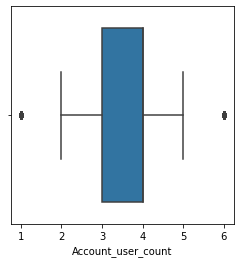

Description of CC_Agent_Score
----------------------------------------------------------------------------
count    11260.000000
mean         3.066066
std          1.373620
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: CC_Agent_Score, dtype: float64 Distribution of CC_Agent_Score
----------------------------------------------------------------------------


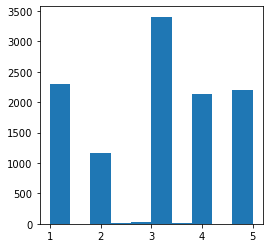

BoxPlot of CC_Agent_Score
----------------------------------------------------------------------------


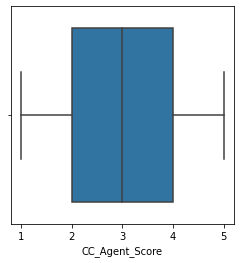

Description of rev_per_month
----------------------------------------------------------------------------
count    11260.000000
mean         6.328828
std         11.512946
min          1.000000
25%          3.000000
50%          5.000000
75%          7.000000
max        140.000000
Name: rev_per_month, dtype: float64 Distribution of rev_per_month
----------------------------------------------------------------------------


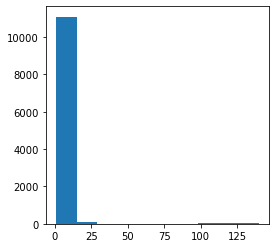

BoxPlot of rev_per_month
----------------------------------------------------------------------------


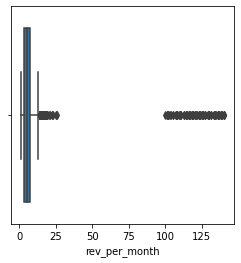

Description of Complain_ly
----------------------------------------------------------------------------
count    11260.000000
mean         0.286039
std          0.445503
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: Complain_ly, dtype: float64 Distribution of Complain_ly
----------------------------------------------------------------------------


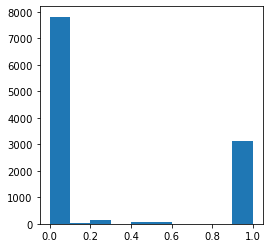

BoxPlot of Complain_ly
----------------------------------------------------------------------------


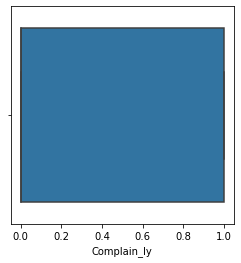

Description of rev_growth_yoy
----------------------------------------------------------------------------
count    11260.000000
mean        16.193037
std          3.757307
min          4.000000
25%         13.000000
50%         15.000000
75%         19.000000
max         28.000000
Name: rev_growth_yoy, dtype: float64 Distribution of rev_growth_yoy
----------------------------------------------------------------------------


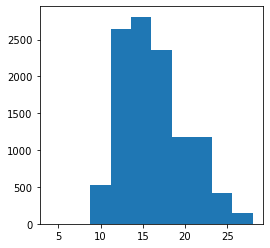

BoxPlot of rev_growth_yoy
----------------------------------------------------------------------------


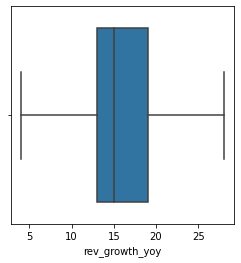

Description of coupon_used_for_payment
----------------------------------------------------------------------------
count    11260.000000
mean         1.790746
std          1.969444
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         16.000000
Name: coupon_used_for_payment, dtype: float64 Distribution of coupon_used_for_payment
----------------------------------------------------------------------------


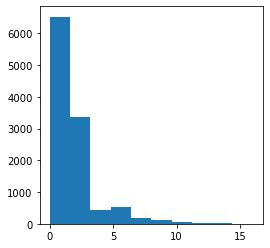

BoxPlot of coupon_used_for_payment
----------------------------------------------------------------------------


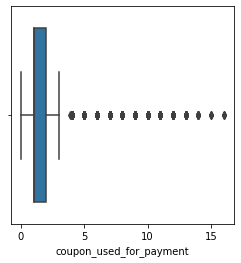

Description of Day_Since_CC_connect
----------------------------------------------------------------------------
count    11260.000000
mean         4.621741
std          3.654222
min          0.000000
25%          2.000000
50%          3.000000
75%          7.000000
max         47.000000
Name: Day_Since_CC_connect, dtype: float64 Distribution of Day_Since_CC_connect
----------------------------------------------------------------------------


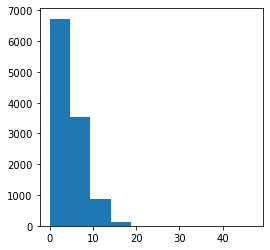

BoxPlot of Day_Since_CC_connect
----------------------------------------------------------------------------


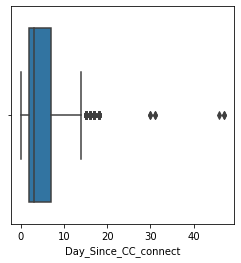

Description of cashback
----------------------------------------------------------------------------
count    11260.000000
mean       196.059267
std        175.305542
min          0.000000
25%        147.543250
50%        165.690000
75%        200.240000
max       1997.000000
Name: cashback, dtype: float64 Distribution of cashback
----------------------------------------------------------------------------


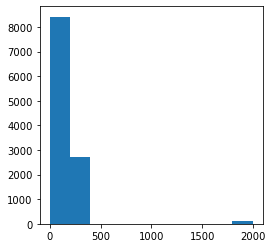

BoxPlot of cashback
----------------------------------------------------------------------------


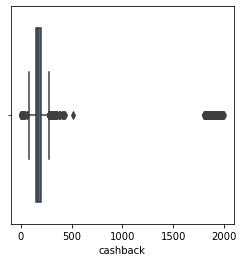

Description of Payment_Credit Card
----------------------------------------------------------------------------
count    11260.000000
mean         0.311812
std          0.463254
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: Payment_Credit Card, dtype: float64 Distribution of Payment_Credit Card
----------------------------------------------------------------------------


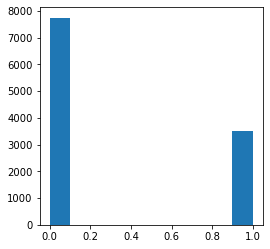

BoxPlot of Payment_Credit Card
----------------------------------------------------------------------------


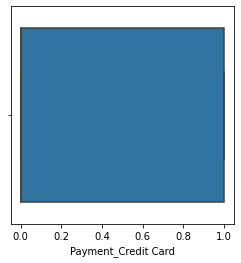

Description of Payment_Debit Card
----------------------------------------------------------------------------
count    11260.000000
mean         0.407371
std          0.491367
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: Payment_Debit Card, dtype: float64 Distribution of Payment_Debit Card
----------------------------------------------------------------------------


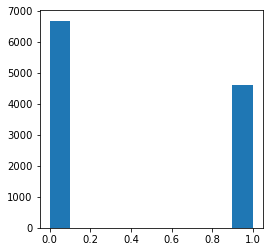

BoxPlot of Payment_Debit Card
----------------------------------------------------------------------------


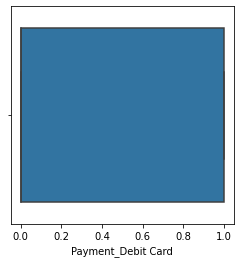

Description of Payment_E wallet
----------------------------------------------------------------------------
count    11260.000000
mean         0.108082
std          0.310497
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Payment_E wallet, dtype: float64 Distribution of Payment_E wallet
----------------------------------------------------------------------------


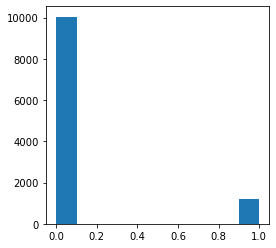

BoxPlot of Payment_E wallet
----------------------------------------------------------------------------


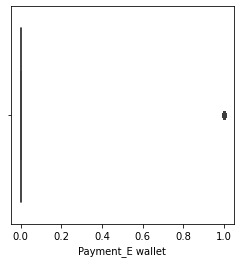

Description of Payment_UPI
----------------------------------------------------------------------------
count    11260.000000
mean         0.073002
std          0.260151
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Payment_UPI, dtype: float64 Distribution of Payment_UPI
----------------------------------------------------------------------------


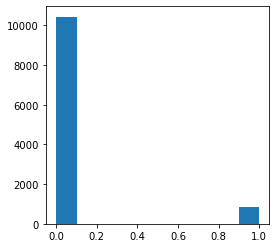

BoxPlot of Payment_UPI
----------------------------------------------------------------------------


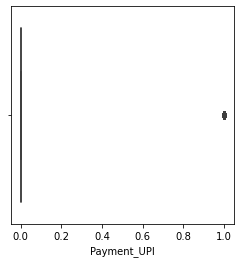

Description of Gender_Male
----------------------------------------------------------------------------
count    11260.000000
mean         0.595382
std          0.490840
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: Gender_Male, dtype: float64 Distribution of Gender_Male
----------------------------------------------------------------------------


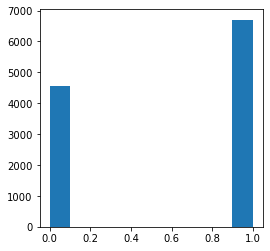

BoxPlot of Gender_Male
----------------------------------------------------------------------------


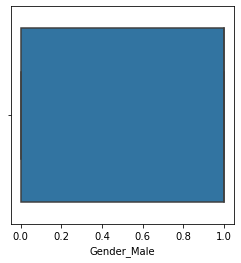

Description of account_segment_Regular
----------------------------------------------------------------------------
count    11260.000000
mean         0.046181
std          0.209887
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: account_segment_Regular, dtype: float64 Distribution of account_segment_Regular
----------------------------------------------------------------------------


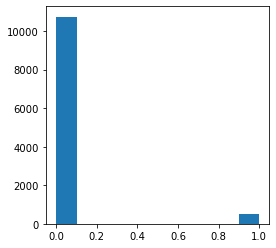

BoxPlot of account_segment_Regular
----------------------------------------------------------------------------


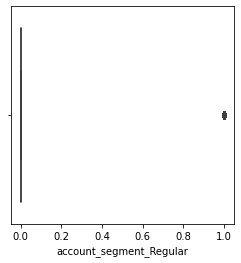

Description of account_segment_Regular_Plus
----------------------------------------------------------------------------
count    11260.000000
mean         0.366252
std          0.481801
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: account_segment_Regular_Plus, dtype: float64 Distribution of account_segment_Regular_Plus
----------------------------------------------------------------------------


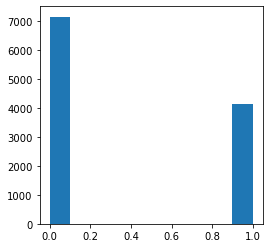

BoxPlot of account_segment_Regular_Plus
----------------------------------------------------------------------------


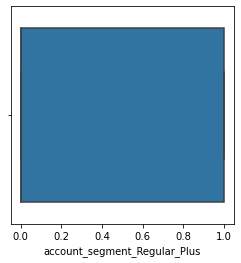

Description of account_segment_Super
----------------------------------------------------------------------------
count    11260.000000
mean         0.360746
std          0.480238
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: account_segment_Super, dtype: float64 Distribution of account_segment_Super
----------------------------------------------------------------------------


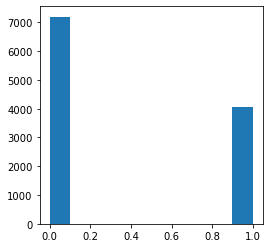

BoxPlot of account_segment_Super
----------------------------------------------------------------------------


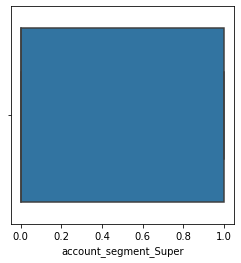

Description of account_segment_Super_Plus
----------------------------------------------------------------------------
count    11260.000000
mean         0.072647
std          0.259567
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: account_segment_Super_Plus, dtype: float64 Distribution of account_segment_Super_Plus
----------------------------------------------------------------------------


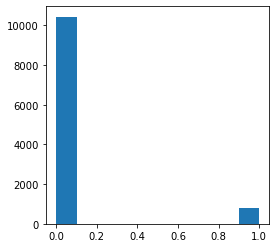

BoxPlot of account_segment_Super_Plus
----------------------------------------------------------------------------


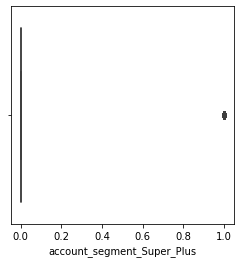

Description of Marital_Status_Married
----------------------------------------------------------------------------
count    11260.000000
mean         0.520426
std          0.499605
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: Marital_Status_Married, dtype: float64 Distribution of Marital_Status_Married
----------------------------------------------------------------------------


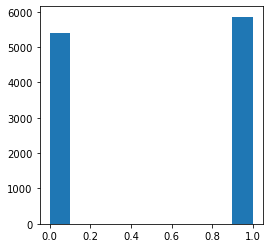

BoxPlot of Marital_Status_Married
----------------------------------------------------------------------------


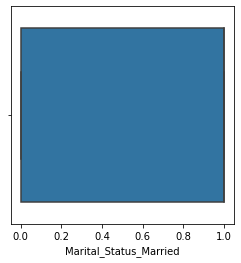

Description of Marital_Status_Single
----------------------------------------------------------------------------
count    11260.000000
mean         0.312611
std          0.463578
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: Marital_Status_Single, dtype: float64 Distribution of Marital_Status_Single
----------------------------------------------------------------------------


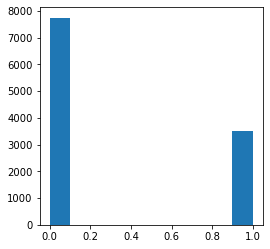

BoxPlot of Marital_Status_Single
----------------------------------------------------------------------------


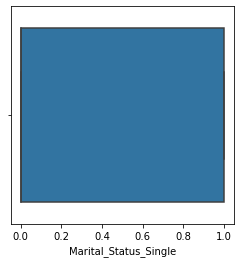

Description of Login_device_Mobile
----------------------------------------------------------------------------
count    11260.000000
mean         0.664476
std          0.472194
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: Login_device_Mobile, dtype: float64 Distribution of Login_device_Mobile
----------------------------------------------------------------------------


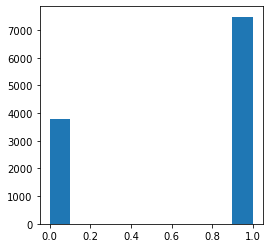

BoxPlot of Login_device_Mobile
----------------------------------------------------------------------------


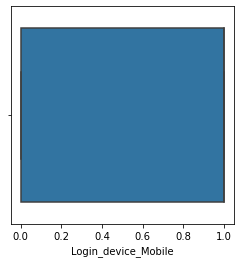

In [92]:
for x in lstnumericcolumns:
    univariateAnalysis_numeric(x,20)

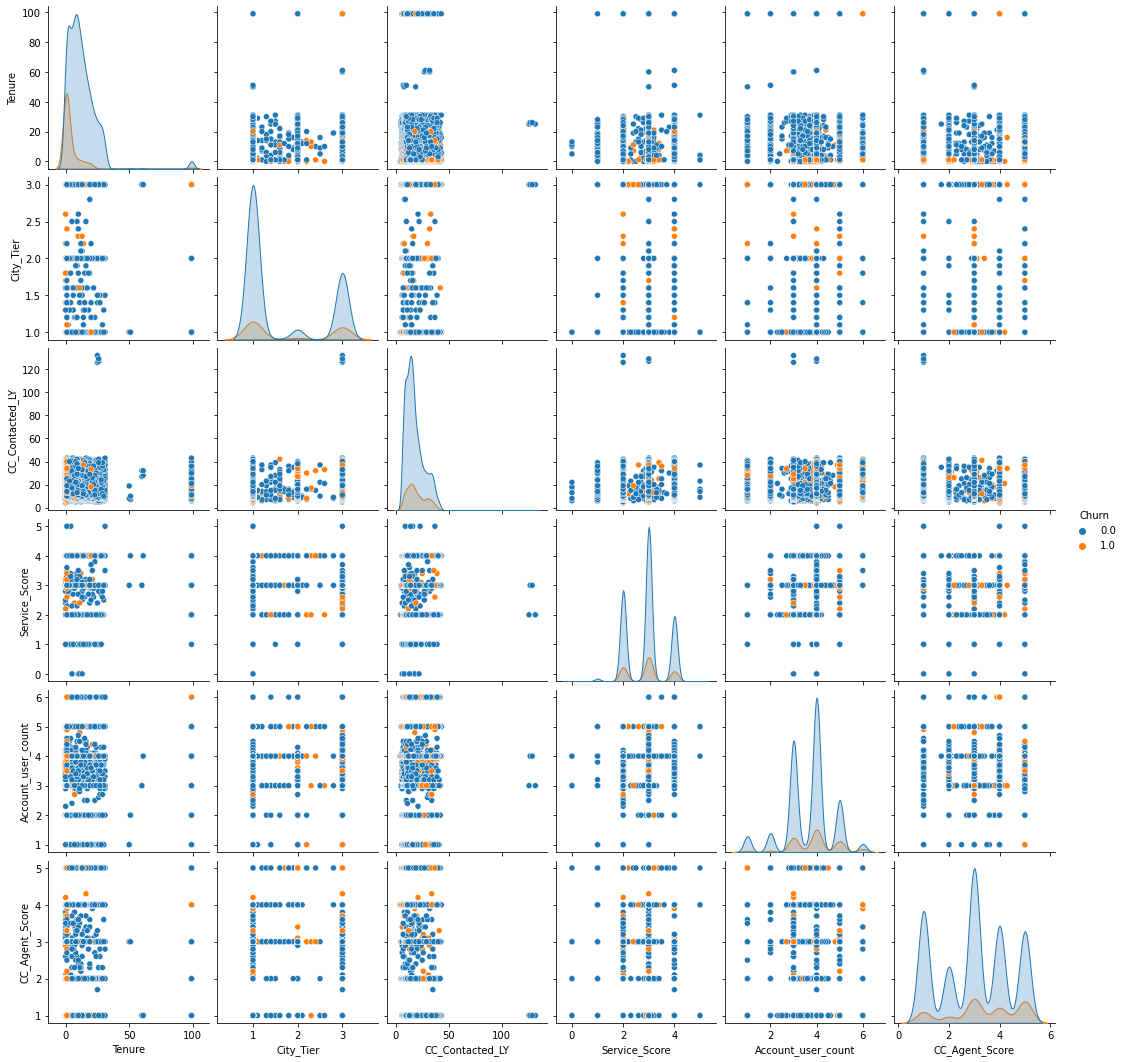

In [93]:


sns.pairplot(df_imputed,hue="Churn",
    x_vars=["Tenure", "City_Tier", "CC_Contacted_LY","Service_Score", "Account_user_count", "CC_Agent_Score"],
    y_vars=["Tenure", "City_Tier", "CC_Contacted_LY","Service_Score", "Account_user_count", "CC_Agent_Score"],
)

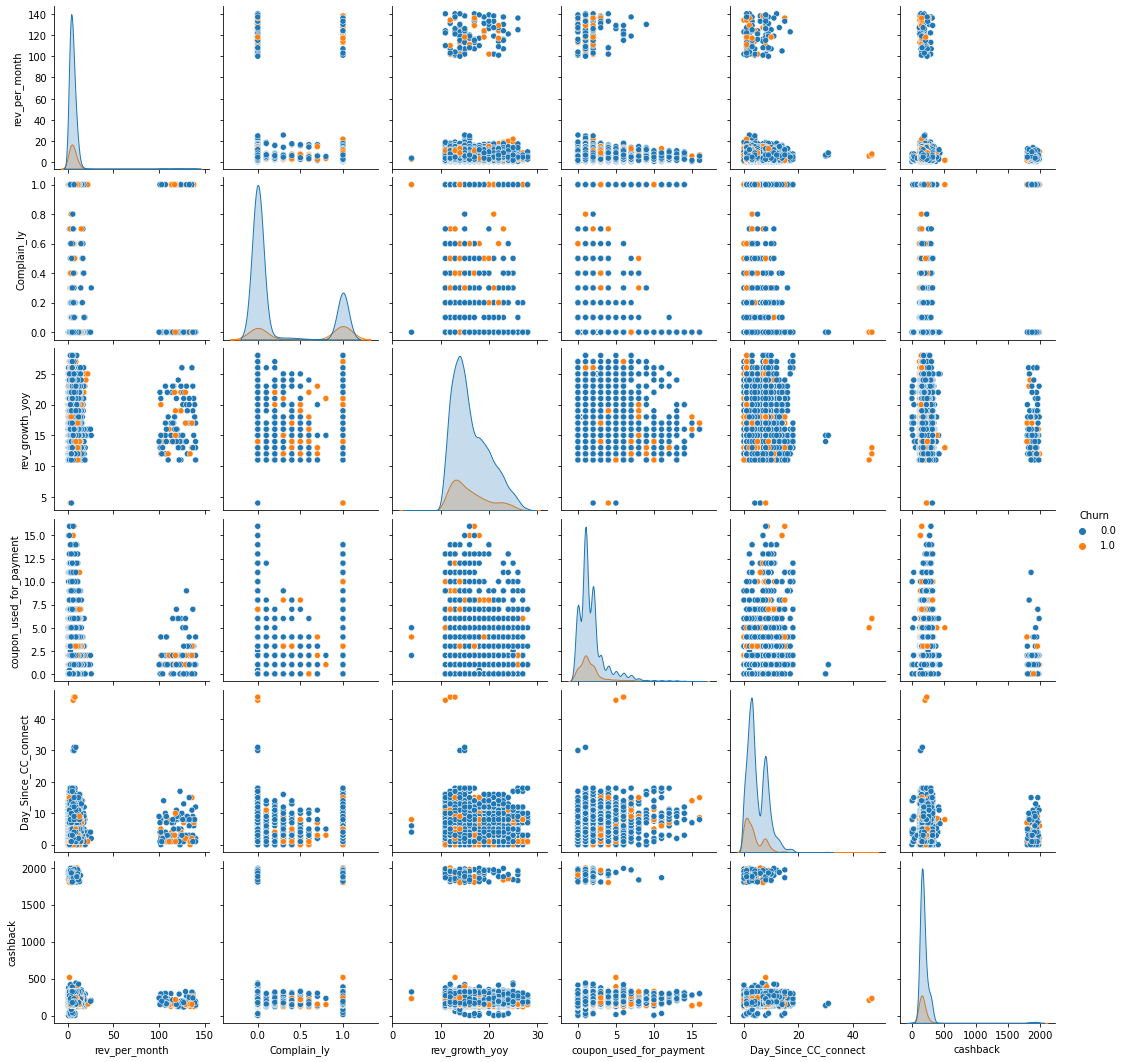

In [94]:


sns.pairplot(df_imputed,hue="Churn",
    x_vars=["rev_per_month", "Complain_ly", "rev_growth_yoy","coupon_used_for_payment", "Day_Since_CC_connect", "cashback"],
    y_vars=["rev_per_month", "Complain_ly", "rev_growth_yoy","coupon_used_for_payment", "Day_Since_CC_connect", "cashback"],
)

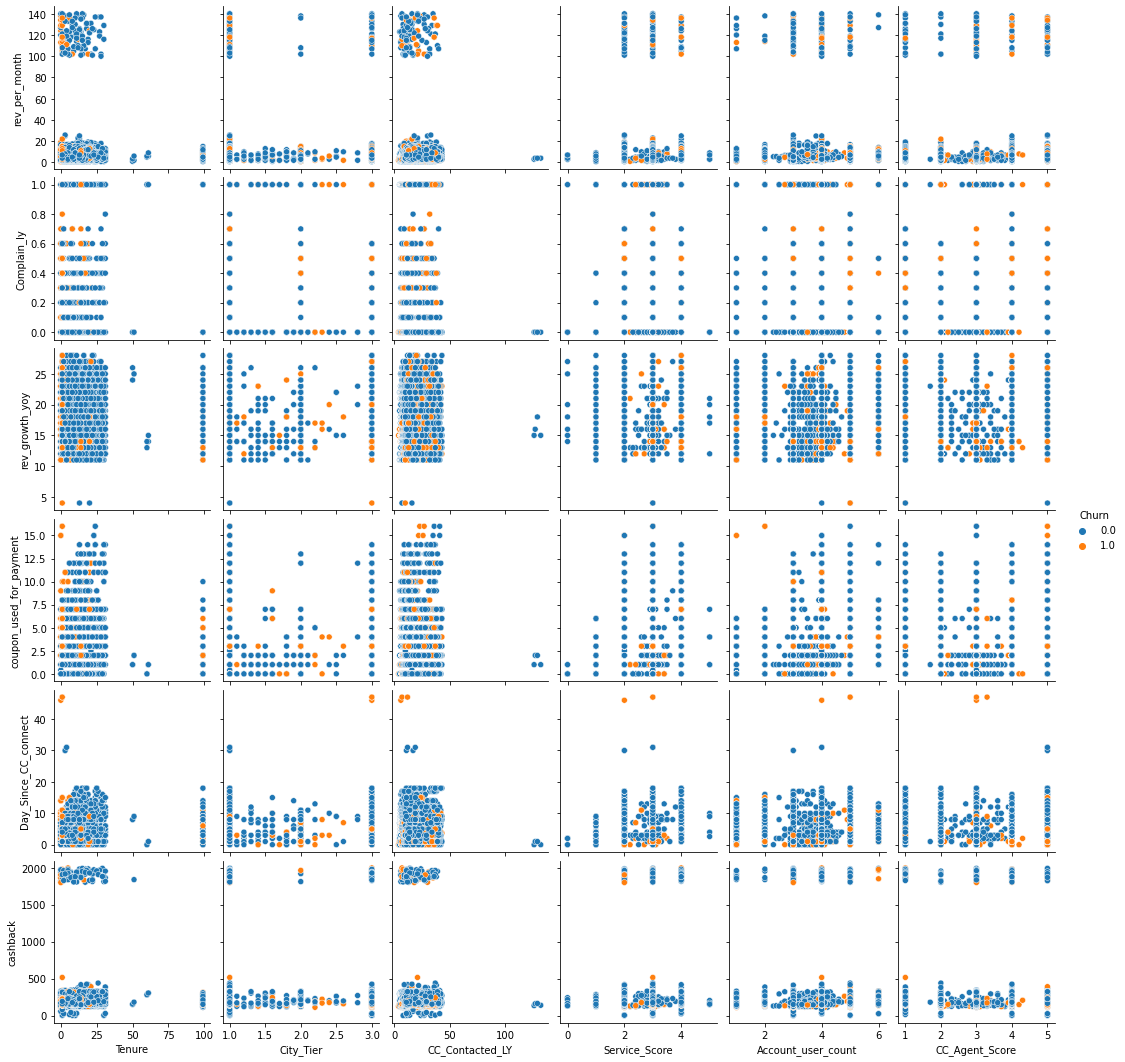

In [95]:


sns.pairplot(df_imputed,hue="Churn",
    x_vars=["Tenure", "City_Tier", "CC_Contacted_LY","Service_Score", "Account_user_count", "CC_Agent_Score"],
    y_vars=["rev_per_month", "Complain_ly", "rev_growth_yoy","coupon_used_for_payment", "Day_Since_CC_connect", "cashback"],
)

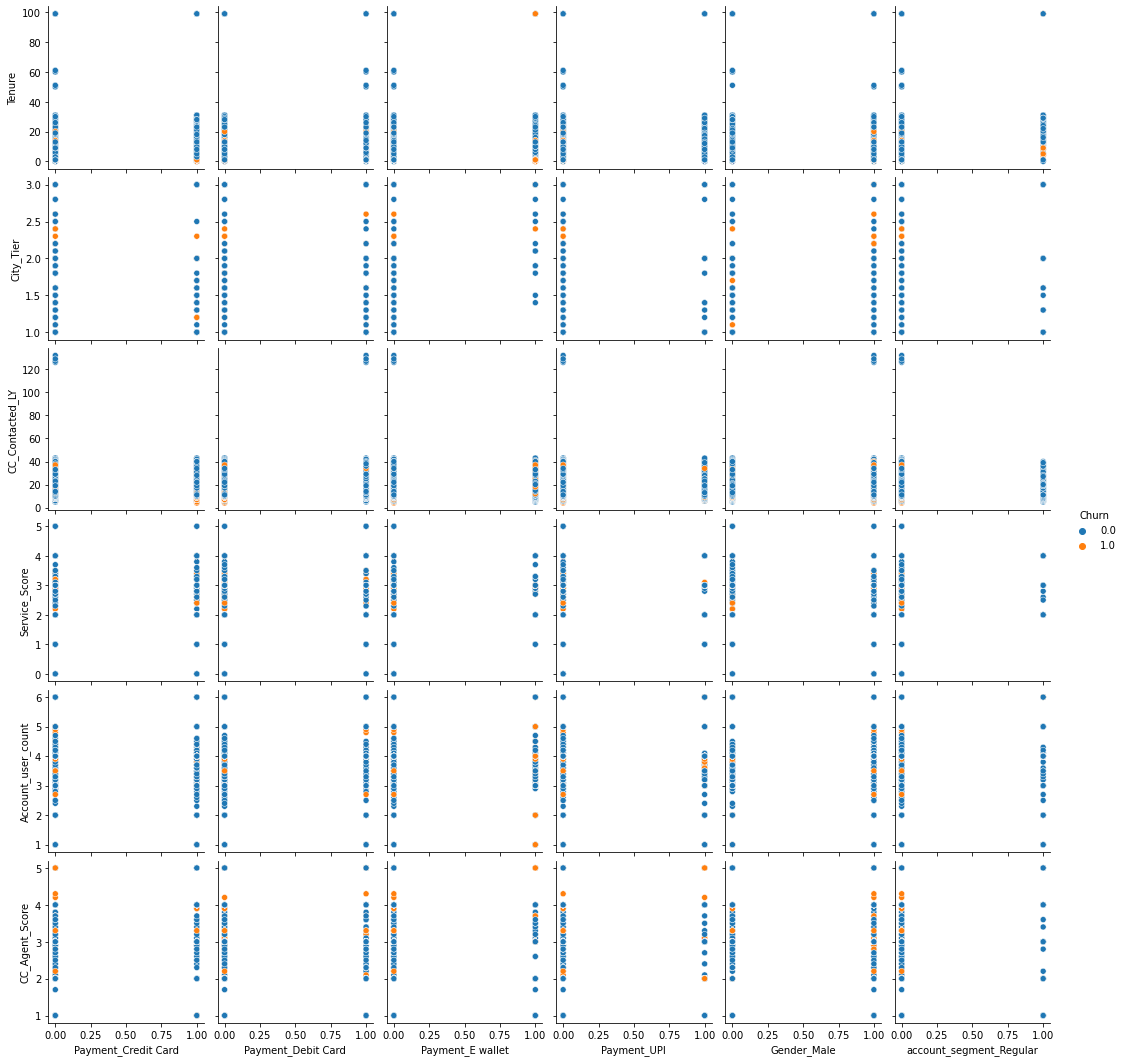

In [96]:


sns.pairplot(df_imputed,hue="Churn",
    x_vars=["Payment_Credit Card", "Payment_Debit Card", "Payment_E wallet","Payment_UPI", "Gender_Male", "account_segment_Regular"],
    y_vars=["Tenure", "City_Tier", "CC_Contacted_LY","Service_Score", "Account_user_count", "CC_Agent_Score"],
)

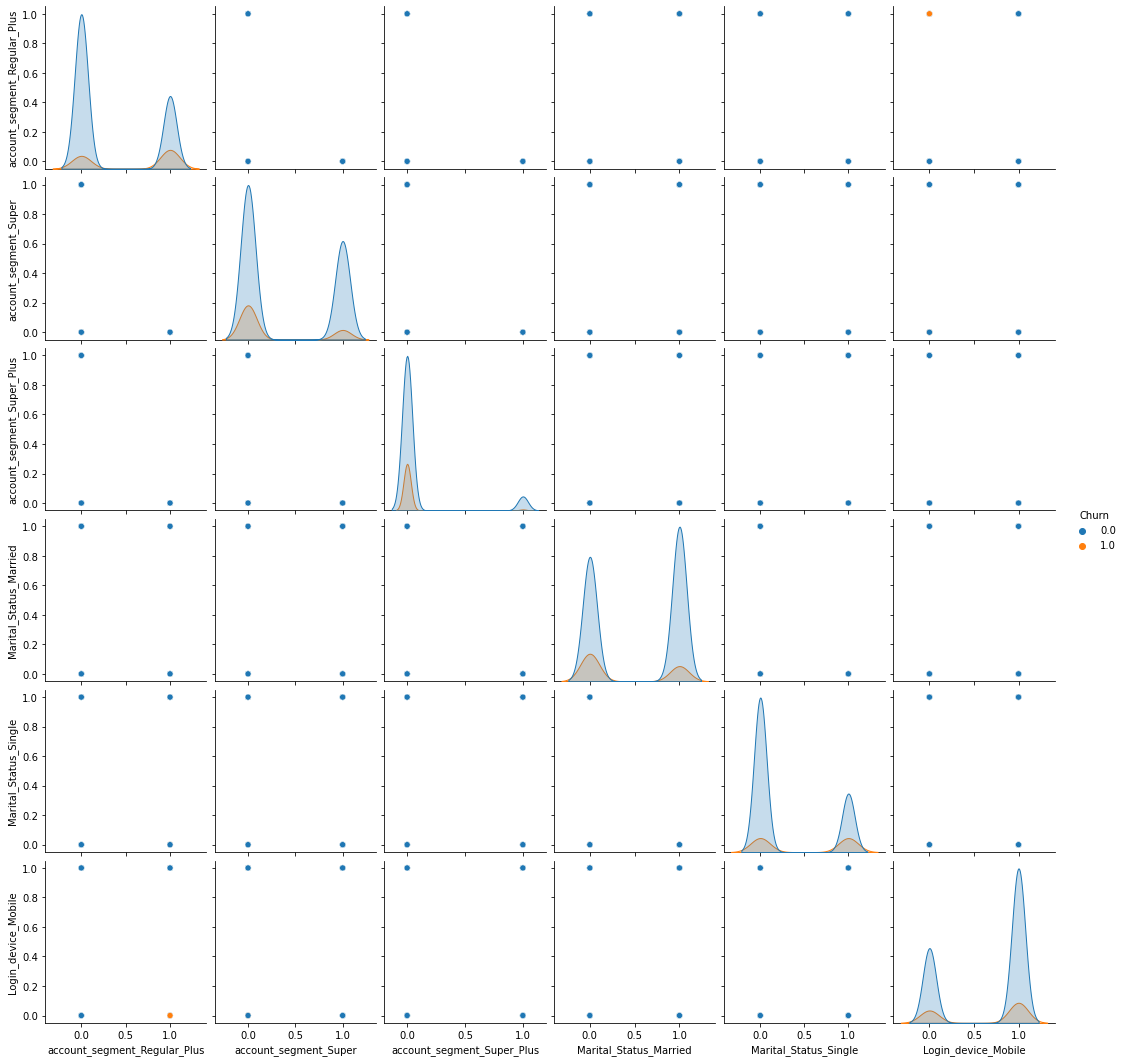

In [97]:


sns.pairplot(df_imputed,hue="Churn",
    x_vars=["account_segment_Regular_Plus", "account_segment_Super", "account_segment_Super_Plus","Marital_Status_Married", "Marital_Status_Single", "Login_device_Mobile"],
    y_vars=["account_segment_Regular_Plus", "account_segment_Super", "account_segment_Super_Plus","Marital_Status_Married", "Marital_Status_Single", "Login_device_Mobile"],
)

In [98]:
df_imputed.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Churn                         11260 non-null  float64
 1   Tenure                        11260 non-null  float64
 2   City_Tier                     11260 non-null  float64
 3   CC_Contacted_LY               11260 non-null  float64
 4   Service_Score                 11260 non-null  float64
 5   Account_user_count            11260 non-null  float64
 6   CC_Agent_Score                11260 non-null  float64
 7   rev_per_month                 11260 non-null  float64
 8   Complain_ly                   11260 non-null  float64
 9   rev_growth_yoy                11260 non-null  float64
 10  coupon_used_for_payment       11260 non-null  float64
 11  Day_Since_CC_connect          11260 non-null  float64
 12  cashback                      11260 non-null  float64
 13  P

<AxesSubplot:>

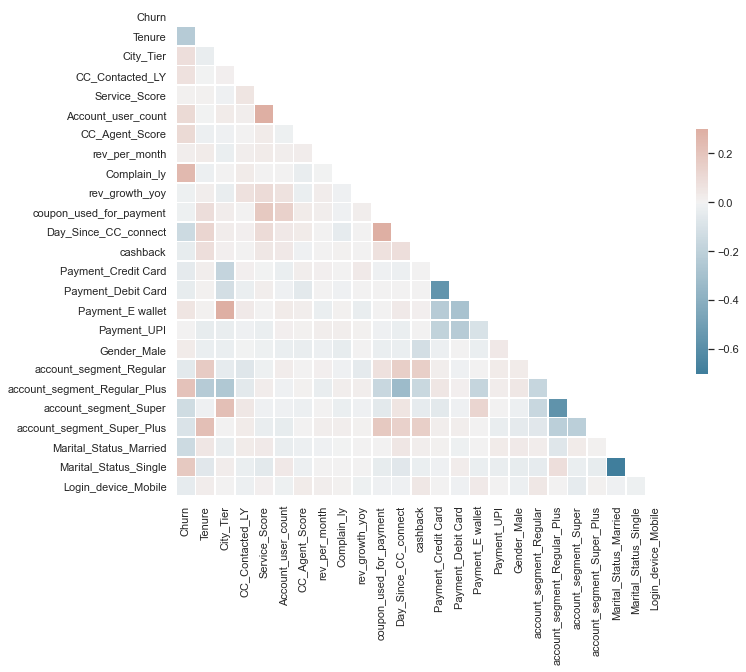

In [99]:
#sns.heatmap(df_imputed.corr(),annot=True);
#ax = sns.heatmap(df_imputed.corr(), annot=True, fmt="f")


from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

# Generate a large random dataset
#rs = np.random.RandomState(33)
#d = pd.DataFrame(data=rs.normal(size=(100, 26)),
#                 columns=list(ascii_letters[26:]))

# Compute the correlation matrix
corr = df_imputed.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Text(0.5, 1.0, 'Important!')

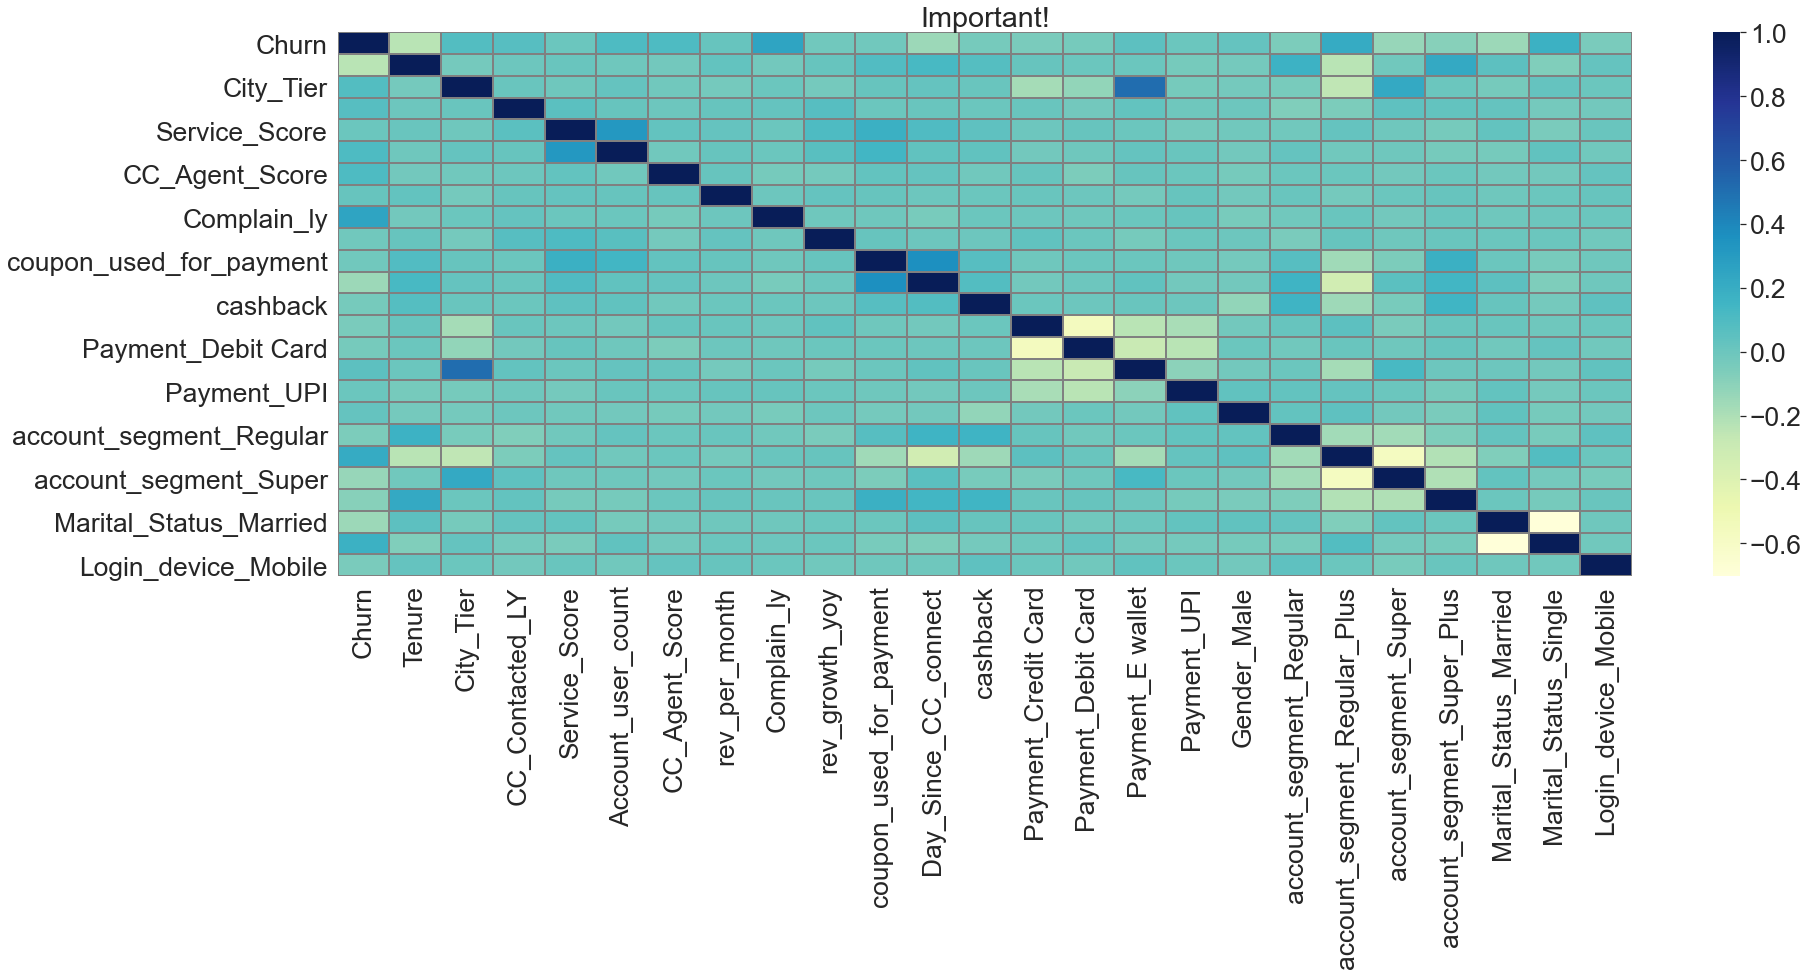

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from copy import copy
import seaborn as sns

#labels = list("ABCDE")
#semi-random data
#np.random.seed(123)
#df = pd.DataFrame(np.random.randint(1, 100, (20, 5)))
#df.columns = labels
#df.A = df.B - df.D
#df.E = df.A + df.C

corr = df_imputed.corr()
sns.set(font_scale=2.4)
plt.subplots(figsize=(29,10))

#define the cmap with clipping values
my_cmap = copy(plt.cm.YlGnBu)
my_cmap.set_over("white")
my_cmap.set_under("white")

g = sns.heatmap(corr,
#    xticklabels=labels,
#    yticklabels=labels,
#    vmin=0.5,
#    vmax=0.9,
    cmap=my_cmap,
    linewidths=1.0,
    linecolor="grey")

#g.set_xticklabels(labels, rotation=60)
g.set_title("Important!")

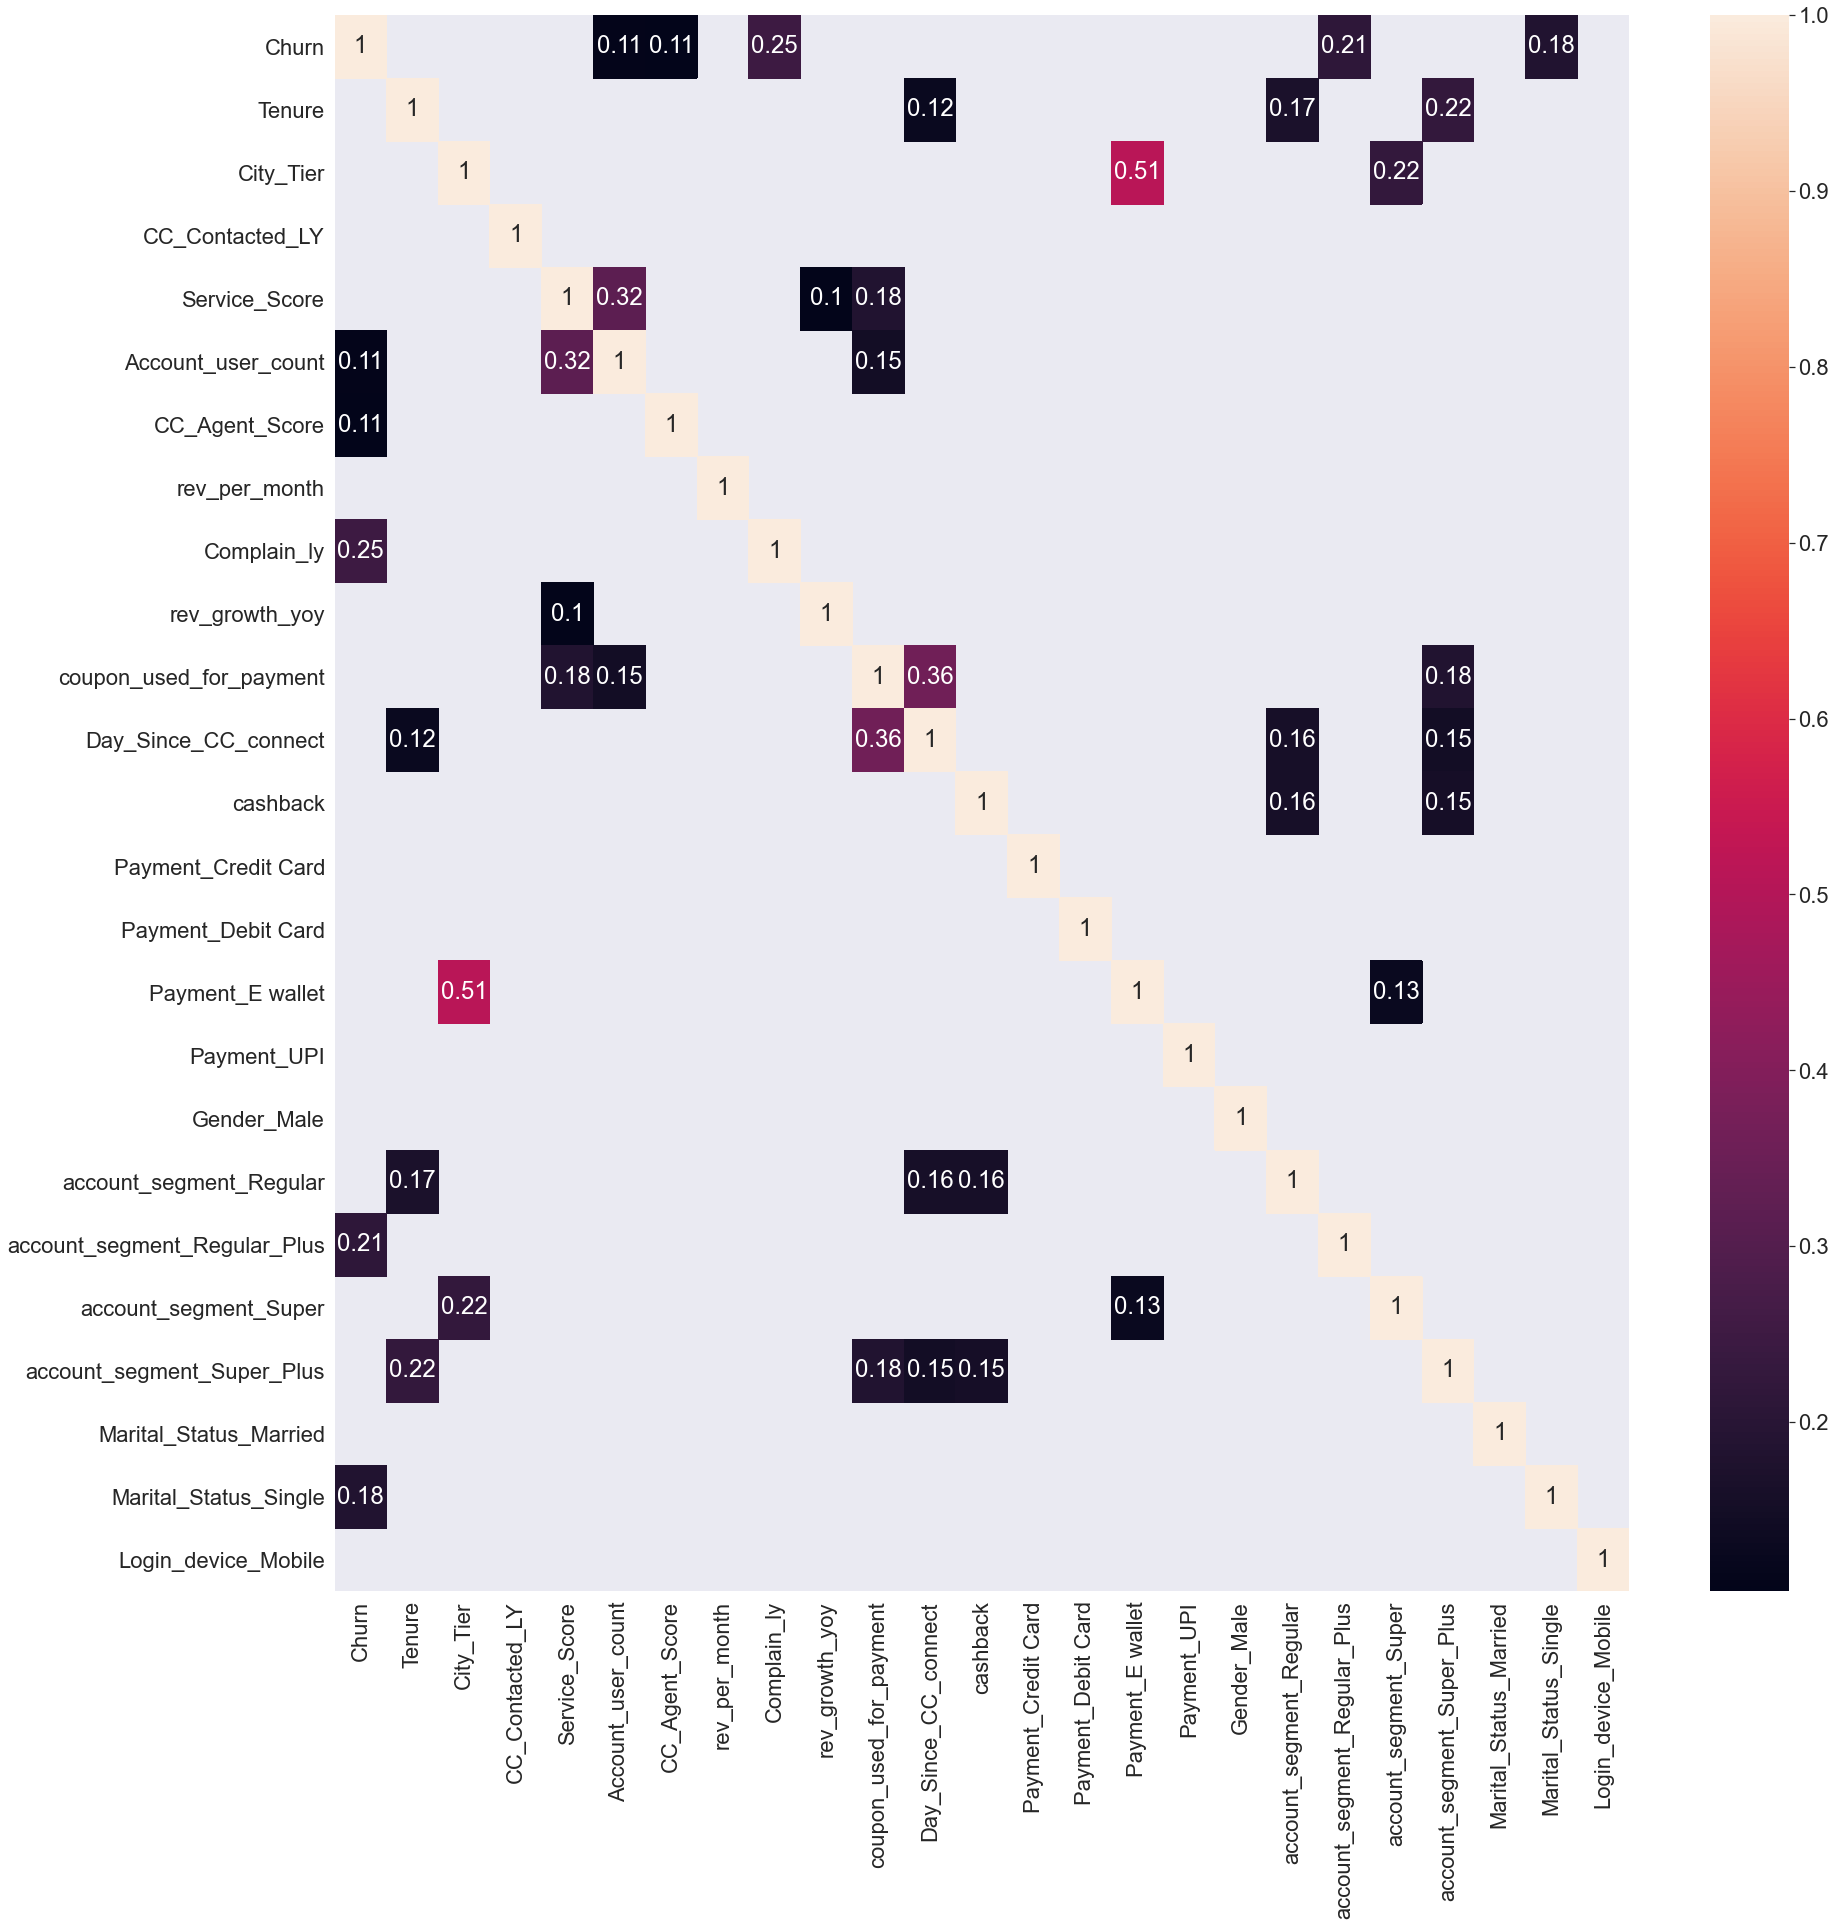

In [101]:
#calculate column correlations and make a seaborn heatmap - Before standardisation
corr = df_imputed.corr()
kot = corr[corr>=0.1]
plt.figure(figsize=(29,29))
#p.set(font_scale=2)
# setting the size of figure to 12 by 10
#p=sns.heatmap(kot, annot=True,square=True,annot_kws={'size':16})
#sns.color_palette("light:#5A9", as_cmap=True)
sns.set(font_scale=2)
heat_map = sns.heatmap(kot, annot=True)
plt.show()


In [102]:
pd.set_option("display.min_rows", 100)

In [103]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load dataset
#df = sns.load_dataset('iris')

# Convert categorical values to numeric
#label_encoder = LabelEncoder()
#df['species'] = label_encoder.fit_transform(df['species'])

# Create correlation matrix
corr_mat = df_imputed.corr(method='pearson')

# Convert correlation matrix to 1-D Series and sort
sorted_mat = corr_mat.unstack().sort_values(ascending=False)

print(sorted_mat)


Churn                         Churn                           1.000000
Payment_Credit Card           Payment_Credit Card             1.000000
CC_Contacted_LY               CC_Contacted_LY                 1.000000
Service_Score                 Service_Score                   1.000000
Account_user_count            Account_user_count              1.000000
CC_Agent_Score                CC_Agent_Score                  1.000000
rev_per_month                 rev_per_month                   1.000000
Complain_ly                   Complain_ly                     1.000000
rev_growth_yoy                rev_growth_yoy                  1.000000
coupon_used_for_payment       coupon_used_for_payment         1.000000
Day_Since_CC_connect          Day_Since_CC_connect            1.000000
Payment_Debit Card            Payment_Debit Card              1.000000
Tenure                        Tenure                          1.000000
Payment_E wallet              Payment_E wallet                1.000000
Paymen

In [104]:
df_imputed.shape

(11260, 25)

In [105]:
from sklearn.preprocessing import StandardScaler

In [106]:
X = StandardScaler()

In [107]:
scaled_df = X.fit_transform(df_imputed)

In [108]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [109]:
wardlink = linkage(scaled_df, method = 'ward')

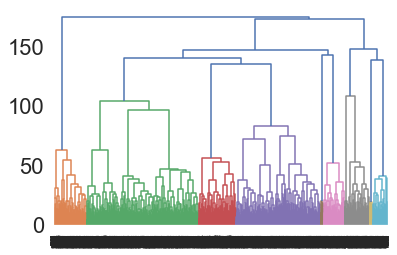

In [110]:
dend = dendrogram(wardlink)

In [111]:
# Defining a funtion to remove outliers
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [112]:
df_imputed.columns

Index(['Churn', 'Tenure', 'City_Tier', 'CC_Contacted_LY', 'Service_Score',
       'Account_user_count', 'CC_Agent_Score', 'rev_per_month', 'Complain_ly',
       'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect',
       'cashback', 'Payment_Credit Card', 'Payment_Debit Card',
       'Payment_E wallet', 'Payment_UPI', 'Gender_Male',
       'account_segment_Regular', 'account_segment_Regular_Plus',
       'account_segment_Super', 'account_segment_Super_Plus',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Login_device_Mobile'],
      dtype='object')

<AxesSubplot:>

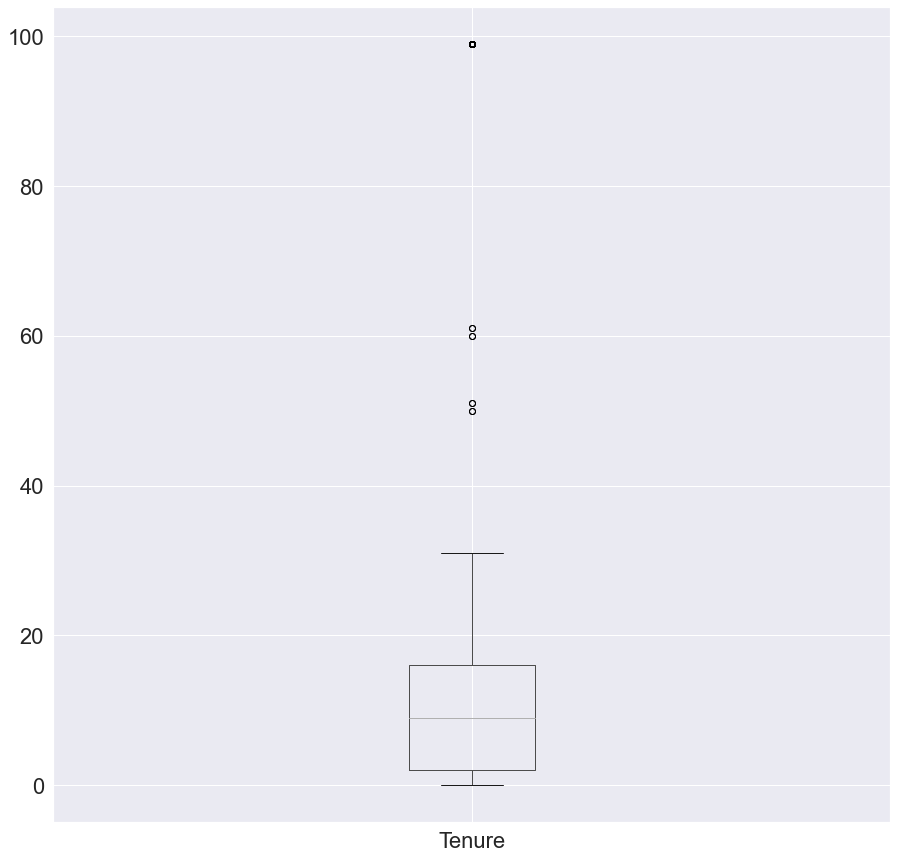

In [113]:
plt.figure(figsize=(15,15))
df_imputed[['Tenure']].boxplot()

In [114]:
#capping and flooring of outliers with upper and lower bounds respectively
#for column in df_imputed.columns:
#    if df_imputed[column].dtype != 'object':
lr,ur=remove_outlier(df_imputed['Tenure'])
df_imputed['Tenure']=np.where(df_imputed['Tenure']>ur,ur,df_imputed['Tenure'])
df_imputed['Tenure']=np.where(df_imputed['Tenure']<lr,lr,df_imputed['Tenure'])

In [115]:
lr,ur=remove_outlier(df_imputed['CC_Contacted_LY'])
df_imputed['CC_Contacted_LY']=np.where(df_imputed['CC_Contacted_LY']>ur,ur,df_imputed['CC_Contacted_LY'])
df_imputed['CC_Contacted_LY']=np.where(df_imputed['CC_Contacted_LY']<lr,lr,df_imputed['CC_Contacted_LY'])

In [116]:
lr,ur=remove_outlier(df_imputed['Service_Score'])
df_imputed['Service_Score']=np.where(df_imputed['Service_Score']>ur,ur,df_imputed['Service_Score'])
df_imputed['Service_Score']=np.where(df_imputed['Service_Score']<lr,lr,df_imputed['Service_Score'])

In [117]:
lr,ur=remove_outlier(df_imputed['Account_user_count'])
df_imputed['Account_user_count']=np.where(df_imputed['Account_user_count']>ur,ur,df_imputed['Account_user_count'])
df_imputed['Account_user_count']=np.where(df_imputed['Account_user_count']<lr,lr,df_imputed['Account_user_count'])

In [118]:
lr,ur=remove_outlier(df_imputed['rev_per_month'])
df_imputed['rev_per_month']=np.where(df_imputed['rev_per_month']>ur,ur,df_imputed['rev_per_month'])
df_imputed['rev_per_month']=np.where(df_imputed['rev_per_month']<lr,lr,df_imputed['rev_per_month'])

In [119]:
lr,ur=remove_outlier(df_imputed['coupon_used_for_payment'])
df_imputed['coupon_used_for_payment']=np.where(df_imputed['coupon_used_for_payment']>ur,ur,df_imputed['coupon_used_for_payment'])
df_imputed['coupon_used_for_payment']=np.where(df_imputed['coupon_used_for_payment']<lr,lr,df_imputed['coupon_used_for_payment'])

In [120]:
lr,ur=remove_outlier(df_imputed['Day_Since_CC_connect'])
df_imputed['Day_Since_CC_connect']=np.where(df_imputed['Day_Since_CC_connect']>ur,ur,df_imputed['Day_Since_CC_connect'])
df_imputed['Day_Since_CC_connect']=np.where(df_imputed['Day_Since_CC_connect']<lr,lr,df_imputed['Day_Since_CC_connect'])

In [121]:
lr,ur=remove_outlier(df_imputed['cashback'])
df_imputed['cashback']=np.where(df_imputed['cashback']>ur,ur,df_imputed['cashback'])
df_imputed['cashback']=np.where(df_imputed['cashback']<lr,lr,df_imputed['cashback'])

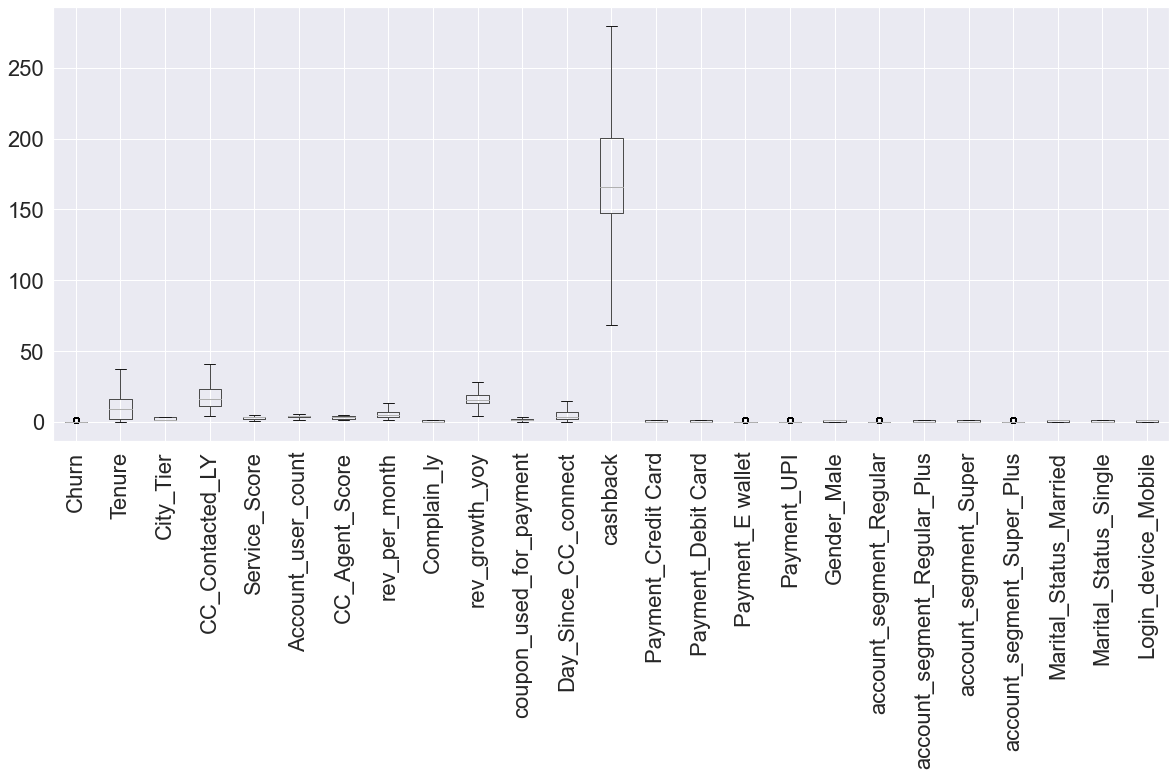

In [122]:
df_imputed.boxplot(figsize=(20,8))
plt.xticks(rotation=90)
plt.show()

In [123]:
df_imputed.columns

Index(['Churn', 'Tenure', 'City_Tier', 'CC_Contacted_LY', 'Service_Score',
       'Account_user_count', 'CC_Agent_Score', 'rev_per_month', 'Complain_ly',
       'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect',
       'cashback', 'Payment_Credit Card', 'Payment_Debit Card',
       'Payment_E wallet', 'Payment_UPI', 'Gender_Male',
       'account_segment_Regular', 'account_segment_Regular_Plus',
       'account_segment_Super', 'account_segment_Super_Plus',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Login_device_Mobile'],
      dtype='object')

In [124]:
num1=['Tenure', 'City_Tier', 'CC_Contacted_LY', 'Service_Score', 'Account_user_count', 'CC_Agent_Score', 'rev_per_month','Complain_ly','rev_growth_yoy','coupon_used_for_payment','Day_Since_CC_connect','cashback'] 
### removing the correlated variable which was dropped earlier and target variable


In [125]:
df_imputed[num1] = df_imputed[num1].apply(lambda x:(x-x.min()) / (x.max()-x.min()))

In [126]:
pd.set_option("display.max_columns", 100)

In [127]:
df_imputed.head()

Churn    Tenure  City_Tier  CC_Contacted_LY  Service_Score  \
0    1.0  0.108108        1.0         0.054054          0.625   
1    1.0  0.000000        0.0         0.108108          0.625   
2    1.0  0.000000        0.0         0.702703          0.375   
3    1.0  0.000000        1.0         0.297297          0.375   
4    1.0  0.000000        0.0         0.216216          0.375   

   Account_user_count  CC_Agent_Score  rev_per_month  Complain_ly  \
0               0.375            0.25       0.666667          1.0   
1               0.625            0.50       0.500000          1.0   
2               0.625            0.50       0.416667          1.0   
3               0.625            1.00       0.583333          0.0   
4               0.375            1.00       0.166667          0.0   

   rev_growth_yoy  coupon_used_for_payment  Day_Since_CC_connect  cashback  \
0        0.291667                 0.285714              0.344828  0.433764   
1        0.458333                 0.000000              0.000000  0.248601   
2        0.416667                 0.000000              0.206897  0.373557   
3        0.791667                 0.000000              0.206897  0.311081   
4        0.291667                 0.285714              0.206897  0.289875   

   Payment_Credit Card  Payment_Debit Card  Payment_E wallet  Payment_UPI  \
0                  0.0                 1.0               0.0          0.0   
1                  0.0                 0.0               0.0          1.0   
2                  0.0                 1.0               0.0          0.0   
3                  0.0                 1.0               0.0          0.0   
4                  1.0                 0.0               0.0          0.0   

   Gender_Male  account_segment_Regular  account_segment_Regular_Plus  \
0          0.0                      0.0                           0.0   
1          1.0                      0.0                           1.0   
2          1.0                      0.0                           1.0   
3          1.0                      0.0                           0.0   
4          1.0                      0.0                           1.0   

   account_segment_Super  account_segment_Super_Plus  Marital_Status_Married  \
0                    1.0                         0.0                     0.0   
1                    0.0                         0.0                     0.0   
2                    0.0                         0.0                     0.0   
3                    1.0                         0.0                     0.0   
4                    0.0                         0.0                     0.0   

   Marital_Status_Single  Login_device_Mobile  
0                    1.0                  1.0  
1                    1.0                  1.0  
2                    1.0                  1.0  
3                    1.0                  1.0  
4                    1.0                  1.0

In [128]:
# Copy all the predictor variables into X dataframe
X = df_imputed.drop('Churn', axis=1)

# Copy target into the y dataframe.  
y = df_imputed['Churn']

In [129]:
# Split X and y into training and test set in 75:25 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [130]:
y_train.value_counts()

0.0    6556
1.0    1326
Name: Churn, dtype: int64

In [131]:
y_test.value_counts()

0.0    2808
1.0     570
Name: Churn, dtype: int64

### Naive Bayes Model

In [132]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [133]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

In [134]:
## Performance Matrix on train data set
y_train_predict = NB_model.predict(X_train)
model_score = NB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))


0.7792438467394063
[[5196 1360]
 [ 380  946]]
              precision    recall  f1-score   support

         0.0       0.93      0.79      0.86      6556
         1.0       0.41      0.71      0.52      1326

    accuracy                           0.78      7882
   macro avg       0.67      0.75      0.69      7882
weighted avg       0.84      0.78      0.80      7882



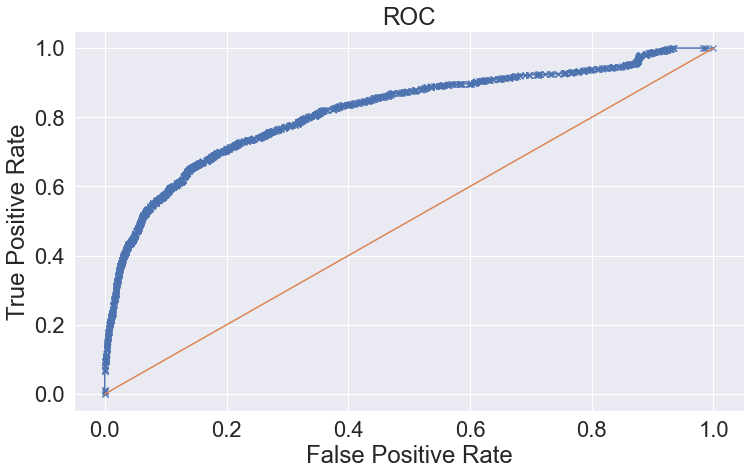

Area under Curve is 0.8171232964955824


In [135]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(y_train,NB_model.predict_proba(X_train)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Naive Bayes')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_train,NB_model.predict_proba(X_train)[:,1]))

In [136]:
## Performance Matrix on test data set
y_test_predict = NB_model.predict(X_test)
model_score = NB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.775902901124926
[[2226  582]
 [ 175  395]]
              precision    recall  f1-score   support

         0.0       0.93      0.79      0.85      2808
         1.0       0.40      0.69      0.51       570

    accuracy                           0.78      3378
   macro avg       0.67      0.74      0.68      3378
weighted avg       0.84      0.78      0.80      3378



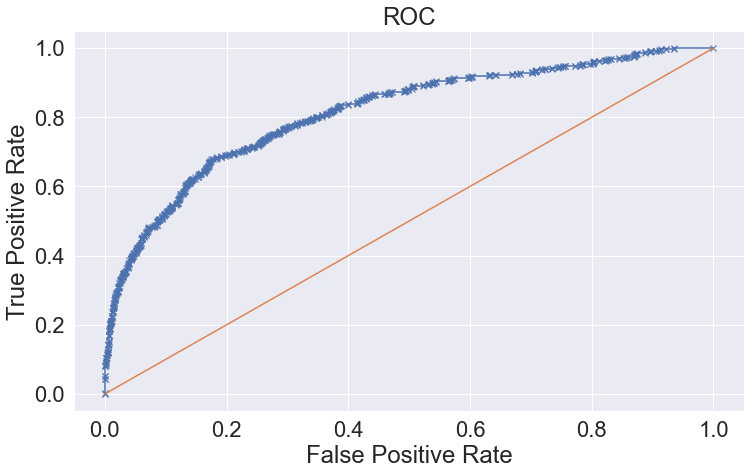

Area under Curve is 0.8134309241765382


In [137]:
#from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(y_test,NB_model.predict_proba(X_test)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Naive Bayes ')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_test,NB_model.predict_proba(X_test)[:,1]))

## Decision Tree

In [138]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

DT_model = DecisionTreeClassifier(criterion = 'gini' )
DT_model.fit(X_train, y_train)


DecisionTreeClassifier()

In [139]:


train_char_label = ['No', 'Yes']
Churn_Tree_File = open(r'C:\Users\athisya\Downloads\Great Learning\capstone\project\CC_EDTH_02_Customer Churn\churn_tree.dot','w')
dot_data = tree.export_graphviz(DT_model, out_file=Churn_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))

Churn_Tree_File.close()


In [140]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(DT_model.feature_importances_, columns = ["Imp"], index = X_train.columns))


                                   Imp
Tenure                        0.295425
City_Tier                     0.026691
CC_Contacted_LY               0.049763
Service_Score                 0.011071
Account_user_count            0.032403
CC_Agent_Score                0.063900
rev_per_month                 0.069086
Complain_ly                   0.062818
rev_growth_yoy                0.056529
coupon_used_for_payment       0.011308
Day_Since_CC_connect          0.073253
cashback                      0.061889
Payment_Credit Card           0.019846
Payment_Debit Card            0.016055
Payment_E wallet              0.018849
Payment_UPI                   0.008554
Gender_Male                   0.016545
account_segment_Regular       0.002212
account_segment_Regular_Plus  0.015844
account_segment_Super         0.021537
account_segment_Super_Plus    0.002426
Marital_Status_Married        0.015896
Marital_Status_Single         0.027431
Login_device_Mobile           0.020669


In [141]:
y_predict = DT_model.predict(X_test)

#                                      Regularising the Decision Tree

In [142]:
    from sklearn import decomposition, datasets
    from sklearn import tree
    from sklearn.pipeline import Pipeline
    from sklearn.model_selection import GridSearchCV
    from sklearn.preprocessing import StandardScaler

In [143]:
std_slc = StandardScaler()

In [144]:
pca = decomposition.PCA()

In [145]:
dec_tree = tree.DecisionTreeClassifier()

In [146]:
    pipe = Pipeline(steps=[('std_slc', std_slc),
                           ('pca', pca),
                           ('dec_tree', dec_tree)])

In [147]:
n_components = list(range(1,X.shape[1]+1,1))

In [148]:
criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]
min_samples_leaf = [1,2]
min_samples_split = [2,3]

In [149]:
parameters = dict(pca__n_components=n_components,dec_tree__criterion=criterion,dec_tree__max_depth=max_depth,dec_tree__min_samples_leaf=min_samples_leaf,dec_tree__min_samples_split=min_samples_split)

In [150]:
    clf_GS = GridSearchCV(pipe, parameters)
    clf_GS.fit(X, y)

GridSearchCV(estimator=Pipeline(steps=[('std_slc', StandardScaler()),
                                       ('pca', PCA()),
                                       ('dec_tree', DecisionTreeClassifier())]),
             param_grid={'dec_tree__criterion': ['gini', 'entropy'],
                         'dec_tree__max_depth': [2, 4, 6, 8, 10, 12],
                         'dec_tree__min_samples_leaf': [1, 2],
                         'dec_tree__min_samples_split': [2, 3],
                         'pca__n_components': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                               11, 12, 13, 14, 15, 16, 17, 18,
                                               19, 20, 21, 22, 23, 24]})

In [151]:
    print('Best Criterion:', clf_GS.best_estimator_.get_params()['dec_tree__criterion'])
    print('Best max_depth:', clf_GS.best_estimator_.get_params()['dec_tree__max_depth'])
    print('Best Number Of Components:', clf_GS.best_estimator_.get_params()['pca__n_components'])
    print('Best min_samples_leaf:', clf_GS.best_estimator_.get_params()['dec_tree__min_samples_leaf'])
    print('Best min_samples_split:', clf_GS.best_estimator_.get_params()['dec_tree__min_samples_split'])
    print(); print(clf_GS.best_estimator_.get_params()['dec_tree'])

Best Criterion: entropy
Best max_depth: 12
Best Number Of Components: 24
Best min_samples_leaf: 1
Best min_samples_split: 3

DecisionTreeClassifier(criterion='entropy', max_depth=12, min_samples_split=3)


In [152]:

reg_dt_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 12,min_samples_leaf=1,min_samples_split=2)
reg_dt_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=12)

In [153]:
churn_tree_regularized = open(r'C:\Users\athisya\Downloads\Great Learning\capstone\project\CC_EDTH_02_Customer Churn\churn_tree_regularized.dot','w')
dot_data = tree.export_graphviz(reg_dt_model, out_file= churn_tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))

churn_tree_regularized.close()

top5_imp = (pd.DataFrame(DT_model.feature_importances_, columns = ["Imp"], index = X_train.columns))


In [154]:
top5_imp.Imp.sort_values(ascending=False)

Tenure                          0.295425
Day_Since_CC_connect            0.073253
rev_per_month                   0.069086
CC_Agent_Score                  0.063900
Complain_ly                     0.062818
cashback                        0.061889
rev_growth_yoy                  0.056529
CC_Contacted_LY                 0.049763
Account_user_count              0.032403
Marital_Status_Single           0.027431
City_Tier                       0.026691
account_segment_Super           0.021537
Login_device_Mobile             0.020669
Payment_Credit Card             0.019846
Payment_E wallet                0.018849
Gender_Male                     0.016545
Payment_Debit Card              0.016055
Marital_Status_Married          0.015896
account_segment_Regular_Plus    0.015844
coupon_used_for_payment         0.011308
Service_Score                   0.011071
Payment_UPI                     0.008554
account_segment_Super_Plus      0.002426
account_segment_Regular         0.002212
Name: Imp, dtype

In [155]:
## Performance Matrix on train data set
y_train_predict = DT_model.predict(X_train)
model_score = DT_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

1.0
[[6556    0]
 [   0 1326]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6556
         1.0       1.00      1.00      1.00      1326

    accuracy                           1.00      7882
   macro avg       1.00      1.00      1.00      7882
weighted avg       1.00      1.00      1.00      7882



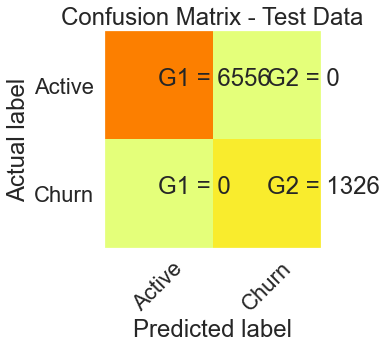

In [156]:
cm = metrics.confusion_matrix(y_train, y_train_predict)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Active', 'Churn']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]
plt.grid(False)
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

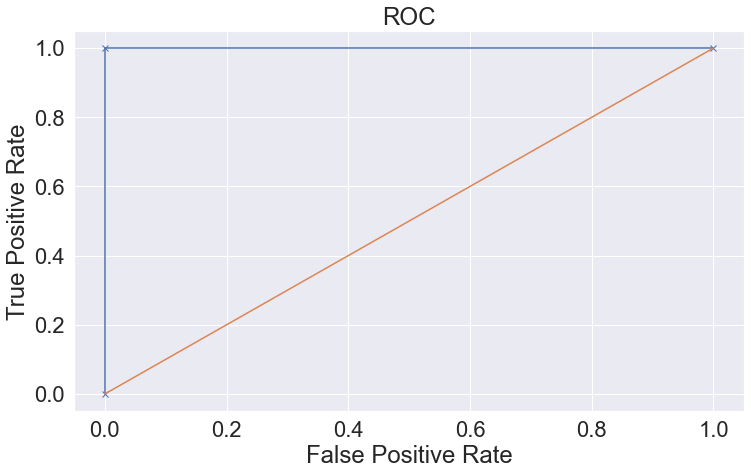

Area under Curve is 1.0


In [157]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(y_train,DT_model.predict_proba(X_train)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Decision Tree')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_train,DT_model.predict_proba(X_train)[:,1]))

In [158]:
## Performance Matrix on test data set
y_test_predict = DT_model.predict(X_test)
model_score = DT_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.9455298993487271
[[2720   88]
 [  96  474]]
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97      2808
         1.0       0.84      0.83      0.84       570

    accuracy                           0.95      3378
   macro avg       0.90      0.90      0.90      3378
weighted avg       0.95      0.95      0.95      3378



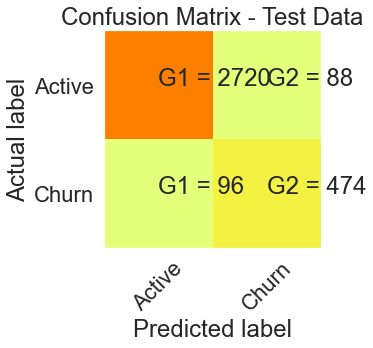

In [159]:
cm = metrics.confusion_matrix(y_test, y_test_predict)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Active', 'Churn']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]
plt.grid(False)
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

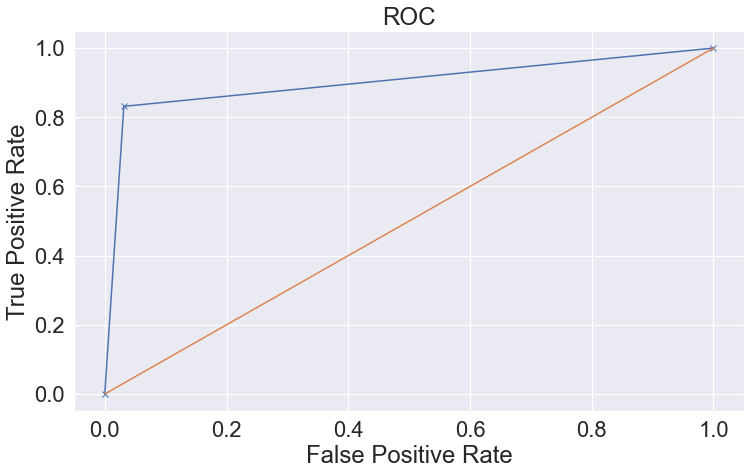

Area under Curve is 0.9001199580146948


In [160]:
#from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(y_test,DT_model.predict_proba(X_test)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Decision Tree ')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_test,DT_model.predict_proba(X_test)[:,1]))

## Random Forest

In [161]:

from sklearn.ensemble import RandomForestClassifier

RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
RF_model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [162]:
## Performance Matrix on train data set
y_train_predict = RF_model.predict(X_train)
model_score =RF_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

1.0
[[6556    0]
 [   0 1326]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6556
         1.0       1.00      1.00      1.00      1326

    accuracy                           1.00      7882
   macro avg       1.00      1.00      1.00      7882
weighted avg       1.00      1.00      1.00      7882



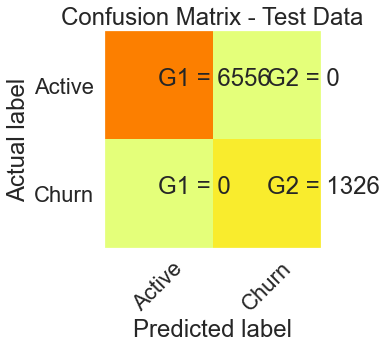

In [163]:
cm = metrics.confusion_matrix(y_train, y_train_predict)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Active', 'Churn']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]
plt.grid(False)
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

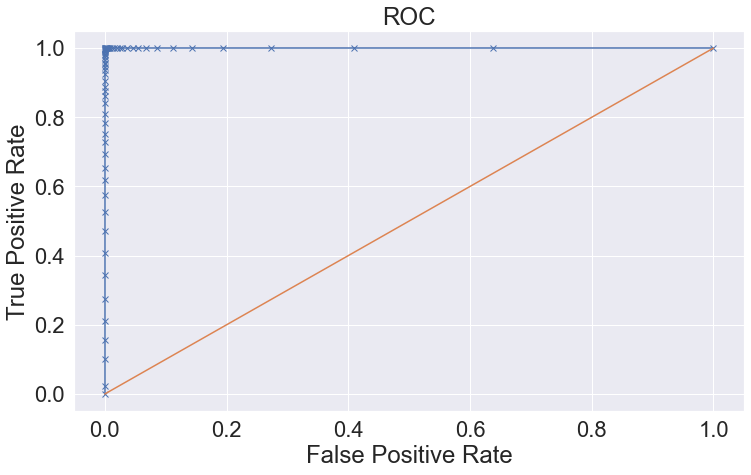

Area under Curve is 1.0


In [164]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(y_train,RF_model.predict_proba(X_train)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_train,RF_model.predict_proba(X_train)[:,1]))

In [165]:
## Performance Matrix on test data set
y_test_predict = RF_model.predict(X_test)
model_score = RF_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.9692125518058022
[[2801    7]
 [  97  473]]
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98      2808
         1.0       0.99      0.83      0.90       570

    accuracy                           0.97      3378
   macro avg       0.98      0.91      0.94      3378
weighted avg       0.97      0.97      0.97      3378



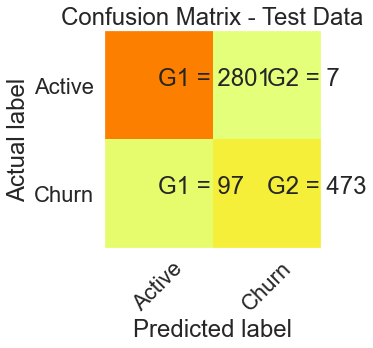

In [166]:
cm = metrics.confusion_matrix(y_test, y_test_predict)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Active', 'Churn']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]
plt.grid(False)
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

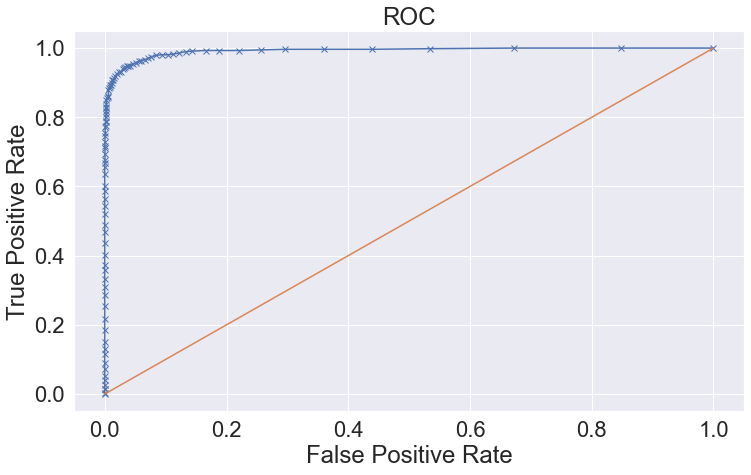

Area under Curve is 0.9920118583495777


In [167]:
#from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(y_test,RF_model.predict_proba(X_test)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_test,RF_model.predict_proba(X_test)[:,1]))

In [168]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [5,7,10],
    'max_features': [4,6],
    'min_samples_leaf': [5,10],
    'min_samples_split': [50,100],
    'n_estimators': [100,150,200]
}

rfcl = RandomForestClassifier(random_state=0)

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 10)

In [169]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [5, 7, 10], 'max_features': [4, 6],
                         'min_samples_leaf': [5, 10],
                         'min_samples_split': [50, 100],
                         'n_estimators': [100, 150, 200]})

In [170]:
grid_search.best_params_

{'max_depth': 10,
 'max_features': 6,
 'min_samples_leaf': 5,
 'min_samples_split': 50,
 'n_estimators': 150}

In [171]:
best_grid = grid_search.best_estimator_

In [172]:
best_grid

RandomForestClassifier(max_depth=10, max_features=6, min_samples_leaf=5,
                       min_samples_split=50, n_estimators=150, random_state=0)

In [173]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [174]:
confusion_matrix(y_train,ytrain_predict)


array([[6433,  123],
       [ 471,  855]], dtype=int64)

In [175]:
print(classification_report(y_train,ytrain_predict))

              precision    recall  f1-score   support

         0.0       0.93      0.98      0.96      6556
         1.0       0.87      0.64      0.74      1326

    accuracy                           0.92      7882
   macro avg       0.90      0.81      0.85      7882
weighted avg       0.92      0.92      0.92      7882



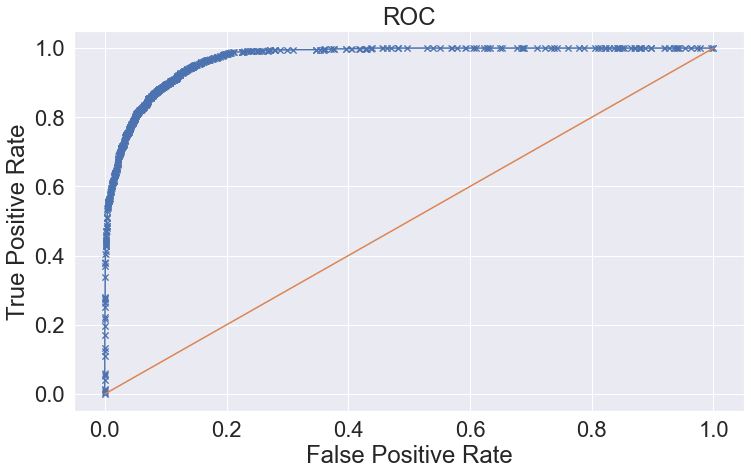

Area under Curve is 0.9693657934380399


In [176]:
#from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(y_train,best_grid.predict_proba(X_train)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_train,best_grid.predict_proba(X_train)[:,1]))

In [177]:
confusion_matrix(y_test,ytest_predict)


array([[2747,   61],
       [ 226,  344]], dtype=int64)

In [178]:
print(classification_report(y_test,ytest_predict))

              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95      2808
         1.0       0.85      0.60      0.71       570

    accuracy                           0.92      3378
   macro avg       0.89      0.79      0.83      3378
weighted avg       0.91      0.92      0.91      3378



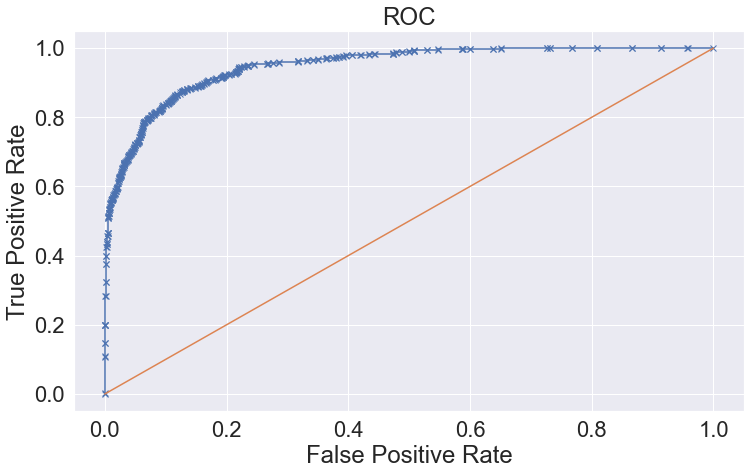

Area under Curve is 0.9478113910131454


In [179]:
#from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(y_test,best_grid.predict_proba(X_test)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_test,best_grid.predict_proba(X_test)[:,1]))

In [180]:
importance = RF_model.feature_importances_

In [181]:
importance

array([0.22509292, 0.02814763, 0.06912594, 0.0206663 , 0.03912809,
       0.05509049, 0.05759025, 0.07090742, 0.0617732 , 0.03033191,
       0.07426058, 0.08182494, 0.02003223, 0.01556596, 0.0113441 ,
       0.00775392, 0.02160493, 0.0038743 , 0.02682998, 0.01427988,
       0.00373904, 0.01662023, 0.02587998, 0.01853579])

In [182]:
#log_odds = RF_model.feature_importances_[0]
pd.DataFrame(importance, 
             X_train.columns, 
             columns=['imp'])\
            .sort_values(by='imp', ascending=False)

imp
Tenure                        0.225093
cashback                      0.081825
Day_Since_CC_connect          0.074261
Complain_ly                   0.070907
CC_Contacted_LY               0.069126
rev_growth_yoy                0.061773
rev_per_month                 0.057590
CC_Agent_Score                0.055090
Account_user_count            0.039128
coupon_used_for_payment       0.030332
City_Tier                     0.028148
account_segment_Regular_Plus  0.026830
Marital_Status_Single         0.025880
Gender_Male                   0.021605
Service_Score                 0.020666
Payment_Credit Card           0.020032
Login_device_Mobile           0.018536
Marital_Status_Married        0.016620
Payment_Debit Card            0.015566
account_segment_Super         0.014280
Payment_E wallet              0.011344
Payment_UPI                   0.007754
account_segment_Regular       0.003874
account_segment_Super_Plus    0.003739

### Logistic Regression

In [183]:
#from sklearn.linear_model import LogisticRegression
#import sklearn.linear_model as lm

from sklearn.linear_model import LogisticRegression 
logreg=LogisticRegression()
result = logreg.fit(X_train,y_train)
#prediction_logreg=logreg.predict(X_test)
#print(accuracy_score(y_test,prediction_logreg))
#logreg = lm.LogisticRegression()

In [184]:
## Performance Matrix on train data set
y_train_predict = logreg.predict(X_train)
model_score =logreg.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.890636894189292
[[6367  189]
 [ 673  653]]
              precision    recall  f1-score   support

         0.0       0.90      0.97      0.94      6556
         1.0       0.78      0.49      0.60      1326

    accuracy                           0.89      7882
   macro avg       0.84      0.73      0.77      7882
weighted avg       0.88      0.89      0.88      7882



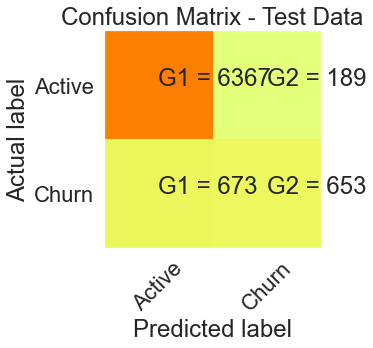

In [185]:
cm = metrics.confusion_matrix(y_train, y_train_predict)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Active', 'Churn']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]
plt.grid(False)
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

AUC: 0.884


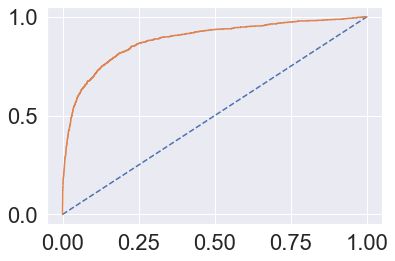

In [186]:
# predict probabilities
probs = logreg.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [187]:
## Performance Matrix on test data set
y_test_predict = logreg.predict(X_test)
model_score = logreg.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.886915334517466
[[2725   83]
 [ 299  271]]
              precision    recall  f1-score   support

         0.0       0.90      0.97      0.93      2808
         1.0       0.77      0.48      0.59       570

    accuracy                           0.89      3378
   macro avg       0.83      0.72      0.76      3378
weighted avg       0.88      0.89      0.88      3378



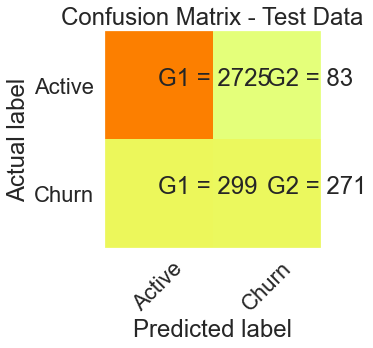

In [188]:
cm = metrics.confusion_matrix(y_test, y_test_predict)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Active', 'Churn']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]
plt.grid(False)
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [189]:
#plot_confusion_matrix(model,X_test,y_test);

AUC: 0.884


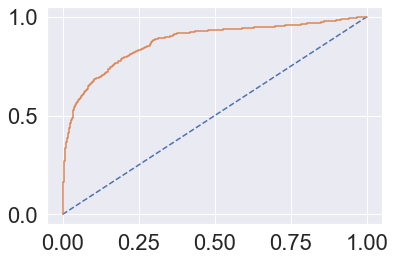

In [190]:
# predict probabilities
probs = logreg.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [191]:
ytest_predict_prob=logreg.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

0         1
0  0.457433  0.542567
1  0.318943  0.681057
2  0.890032  0.109968
3  0.747432  0.252568
4  0.993169  0.006831

In [192]:
print(logreg.coef_, logreg.intercept_)

[[-6.20186612  0.76403208  1.07825682 -0.24903765  1.42247193  1.04668743
   1.72638845  1.71454429 -0.4142776   0.49326583 -1.06284027 -0.99661178
  -0.71170518 -0.51645932 -0.0177025  -0.63335463  0.23820346  1.45937444
  -0.02211066 -1.22063347  0.05523791 -0.33489697  0.68638297 -0.3523449 ]] [-2.07735468]


In [193]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.compose import TransformedTargetRegressor

In [194]:
logreg.coef_

array([[-6.20186612,  0.76403208,  1.07825682, -0.24903765,  1.42247193,
         1.04668743,  1.72638845,  1.71454429, -0.4142776 ,  0.49326583,
        -1.06284027, -0.99661178, -0.71170518, -0.51645932, -0.0177025 ,
        -0.63335463,  0.23820346,  1.45937444, -0.02211066, -1.22063347,
         0.05523791, -0.33489697,  0.68638297, -0.3523449 ]])

In [195]:
#feature_names = logreg[:-1].get_feature_names_out()

#coefs = pd.DataFrame(logreg.named_steps["transformedtargetregressor"].logreg.coef_,
#    columns=["Coefficients"],
#    index=feature_names)

coefs = logreg.coef_.sort()
coefs
#print(numbers)
log_odds = logreg.coef_[0]
pd.DataFrame(log_odds, 
             X_train.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)

coef
Login_device_Mobile           1.726388
Marital_Status_Single         1.714544
Marital_Status_Married        1.459374
account_segment_Super_Plus    1.422472
account_segment_Super         1.078257
account_segment_Regular_Plus  1.046687
account_segment_Regular       0.764032
Gender_Male                   0.686383
Payment_UPI                   0.493266
Payment_E wallet              0.238203
Payment_Debit Card            0.055238
Payment_Credit Card          -0.017702
cashback                     -0.022111
Day_Since_CC_connect         -0.249038
coupon_used_for_payment      -0.334897
rev_growth_yoy               -0.352345
Complain_ly                  -0.414278
rev_per_month                -0.516459
CC_Agent_Score               -0.633355
Account_user_count           -0.711705
Service_Score                -0.996612
CC_Contacted_LY              -1.062840
City_Tier                    -1.220633
Tenure                       -6.201866

## Applying GridSearchCV for Logistic Regression

In [196]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [197]:
grid={'penalty':['l2','none'],
      'solver':['sag','lbfgs'],
      'tol':[0.0001,0.00001]}

In [198]:
model = LogisticRegression(max_iter=10000,n_jobs=2)

In [199]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [200]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l2', 'none'], 'solver': ['sag', 'lbfgs'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [201]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'none', 'solver': 'sag', 'tol': 0.0001} 

LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='sag')


In [202]:
best_model = grid_search.best_estimator_

In [203]:
# Prediction on the training set

ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [204]:
## Getting the probabilities on the test set

ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

0         1
0  0.451139  0.548861
1  0.302019  0.697981
2  0.897084  0.102916
3  0.743593  0.256407
4  0.994212  0.005788

              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94      6556
         1.0       0.77      0.51      0.62      1326

    accuracy                           0.89      7882
   macro avg       0.84      0.74      0.78      7882
weighted avg       0.88      0.89      0.88      7882
 



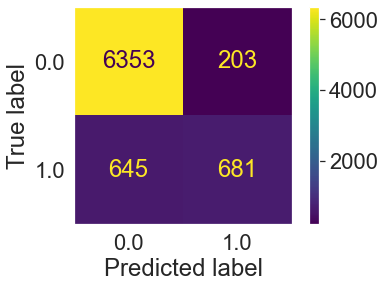

In [205]:
## Confusion matrix on the training data

plot_confusion_matrix(best_model,X_train,y_train)
plt.grid(False)
print(classification_report(y_train, ytrain_predict),'\n');

AUC: 0.885


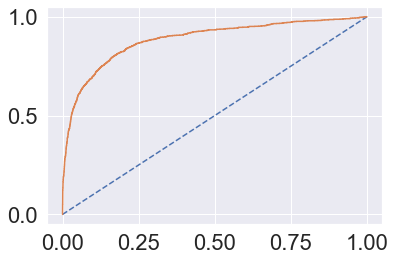

In [206]:
# predict probabilities
probs = grid_search.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

              precision    recall  f1-score   support

         0.0       0.90      0.97      0.93      2808
         1.0       0.76      0.49      0.59       570

    accuracy                           0.89      3378
   macro avg       0.83      0.73      0.76      3378
weighted avg       0.88      0.89      0.88      3378
 



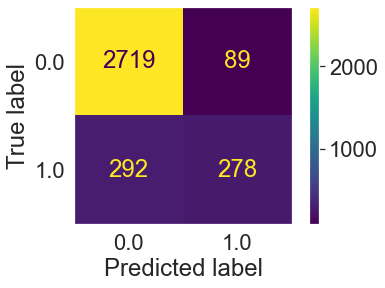

In [207]:
## Confusion matrix on the test data

plot_confusion_matrix(best_model,X_test,y_test)
plt.grid(False)
print(classification_report(y_test, ytest_predict),'\n');

AUC: 0.885


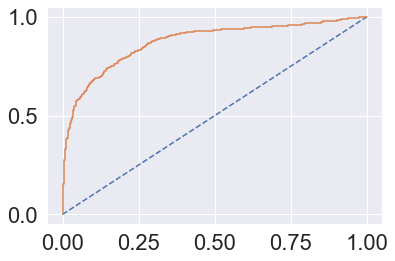

In [208]:
# predict probabilities
probs = grid_search.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

### XGBoost

In [209]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(n_estimators=100)
xgb_model.fit(X_train, y_train)
#prediction_xgb = xgb_model.predict(X_test)
#print(accuracy_score(y_test, prediction_xgb))

C:\Users\athisya\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:23:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [210]:
## Performance Matrix on train data set
y_train_predict = xgb_model.predict(X_train)
model_score =xgb_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9996193859426542
[[6556    0]
 [   3 1323]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6556
         1.0       1.00      1.00      1.00      1326

    accuracy                           1.00      7882
   macro avg       1.00      1.00      1.00      7882
weighted avg       1.00      1.00      1.00      7882



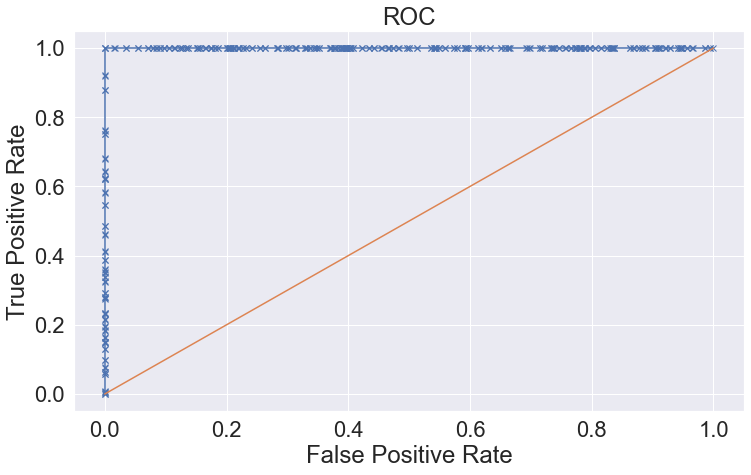

Area under Curve is 0.9999997699366039


In [211]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(y_train,xgb_model.predict_proba(X_train)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='XGBoost ')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_train,xgb_model.predict_proba(X_train)[:,1]))


In [212]:
## Performance Matrix on test data set
y_test_predict = xgb_model.predict(X_test)
model_score = xgb_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.9727649496743636
[[2788   20]
 [  72  498]]
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      2808
         1.0       0.96      0.87      0.92       570

    accuracy                           0.97      3378
   macro avg       0.97      0.93      0.95      3378
weighted avg       0.97      0.97      0.97      3378



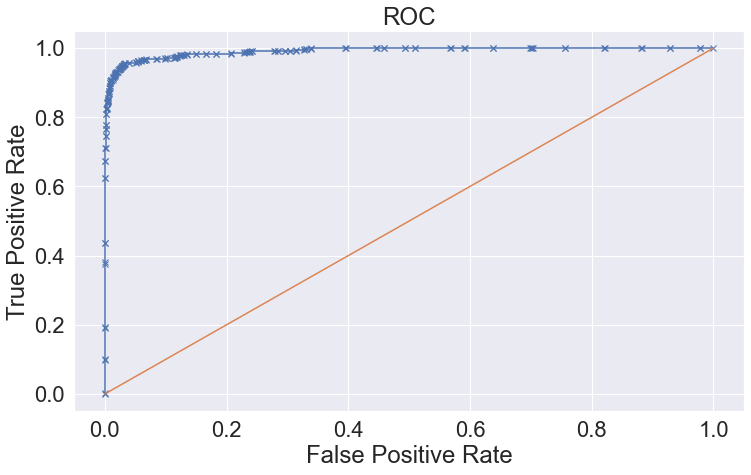

Area under Curve is 0.9910818713450292


In [213]:
#from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(y_test,xgb_model.predict_proba(X_test)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='XGBoost ')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_test,xgb_model.predict_proba(X_test)[:,1]))

In [214]:
importance = xgb_model.feature_importances_

In [215]:
pd.DataFrame(importance, 
             X_train.columns, 
             columns=['imp'])\
            .sort_values(by='imp', ascending=False)

imp
Tenure                        0.133353
Complain_ly                   0.092833
Payment_E wallet              0.063916
account_segment_Super         0.054253
account_segment_Regular       0.048707
Marital_Status_Single         0.045071
CC_Agent_Score                0.042468
Day_Since_CC_connect          0.041384
account_segment_Regular_Plus  0.038767
rev_per_month                 0.038386
Login_device_Mobile           0.038284
City_Tier                     0.038151
Payment_Credit Card           0.036407
Payment_UPI                   0.033471
account_segment_Super_Plus    0.030338
Account_user_count            0.028032
Gender_Male                   0.027670
Marital_Status_Married        0.027642
Payment_Debit Card            0.026320
CC_Contacted_LY               0.025057
rev_growth_yoy                0.023385
coupon_used_for_payment       0.023182
cashback                      0.022547
Service_Score                 0.020376

### Smote

In [216]:
from imblearn.over_sampling import SMOTE


In [217]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [218]:
X_train_res.shape

(13112, 24)

In [219]:
X_train.shape

(7882, 24)

In [220]:
y_train_res.value_counts()

0.0    6556
1.0    6556
Name: Churn, dtype: int64

In [221]:
y_train.value_counts()

0.0    6556
1.0    1326
Name: Churn, dtype: int64

## Naive Bayes with SMOTE

In [222]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [223]:
NB_SM_model = GaussianNB()
NB_SM_model.fit(X_train_res, y_train_res)

GaussianNB()

In [224]:
## Performance Matrix on train data set with SMOTE
y_train_predict = NB_SM_model.predict(X_train_res)
model_score = NB_SM_model.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res ,y_train_predict))

0.726967663209274
[[4070 2486]
 [1094 5462]]
              precision    recall  f1-score   support

         0.0       0.79      0.62      0.69      6556
         1.0       0.69      0.83      0.75      6556

    accuracy                           0.73     13112
   macro avg       0.74      0.73      0.72     13112
weighted avg       0.74      0.73      0.72     13112



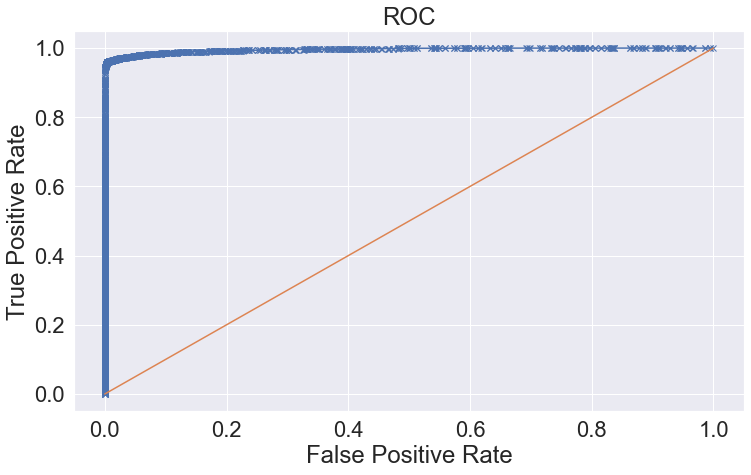

Area under Curve is 0.9952238582060744


In [225]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(y_train_res,xgb_model.predict_proba(X_train_res)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Naive Bayes after smote ')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_train_res,xgb_model.predict_proba(X_train_res)[:,1]))


In [226]:
## Performance Matrix on test data set
y_test_predict = NB_SM_model.predict(X_test)
model_score = NB_SM_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.6521610420367081
[[1738 1070]
 [ 105  465]]
              precision    recall  f1-score   support

         0.0       0.94      0.62      0.75      2808
         1.0       0.30      0.82      0.44       570

    accuracy                           0.65      3378
   macro avg       0.62      0.72      0.59      3378
weighted avg       0.84      0.65      0.70      3378



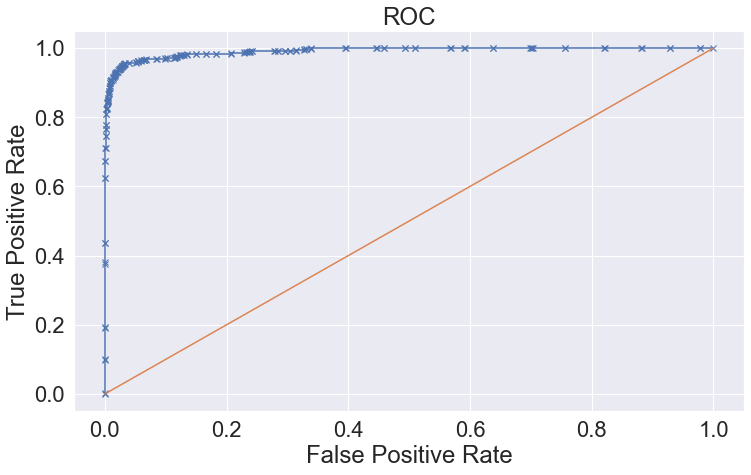

Area under Curve is 0.9910818713450292


In [227]:
#from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(y_test,xgb_model.predict_proba(X_test)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Naive Bayes after smote ')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_test,xgb_model.predict_proba(X_test)[:,1]))